# Loading Data and Imports

In [ ]:
import numpy as np
import joblib
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.impute import KNNImputer
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, auc, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from imblearn.over_sampling import SMOTE  # or any other SMOTE variant
from imblearn.combine import SMOTETomek

import shap
from sklearn.inspection import PartialDependenceDisplay




sns.set(style="whitegrid")

In [ ]:
scd_df = pd.read_csv("/content/drive/MyDrive/Capstone_Trial_Methodology/synthetic_scd_pain_crisis_dataset.csv")

Examine the first few rows, check data types, descriptive statistics for numerical and categorical features, and verify the `Patient ID` column.

In [ ]:
scd_df.head() # display first five rows

,Patient ID,Age,Gender,Ethnicity,Weight (kg),Height (cm),SCD Genotype,Heart Rate (bpm),Respiratory Rate (bpm),Body Temperature (°C),...,Fever,Swelling,Headache,Jaundice,Pallor,Anemia,Acute Chest Syndrome,Stroke History,Pain Crises Frequency (past year),Hospitalization History (past year)
0,PID_00001,37,Male,African,56.2,160.3,HbSC,78.0,16,39.4,...,4,2,3,5,1,1,2,0,5,1
1,PID_00002,27,Female,African,89.3,183.3,HbSβ⁺,77.0,17,36.8,...,0,2,0,1,1,1,2,2,1,0
2,PID_00003,39,Male,African,65.3,170.0,HbSS,81.0,17,36.9,...,5,0,4,0,1,1,3,0,4,3
3,PID_00004,52,Female,African,76.2,158.4,HbSC,126.0,15,37.7,...,2,1,1,0,1,1,1,1,5,3
4,PID_00005,26,Male,African,78.8,186.3,HbSβ⁰,67.0,13,37.4,...,1,1,1,0,1,1,0,0,0,0


Let's see how the info looks like here

In [ ]:
print("DataFrame Info:")
scd_df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient ID                           55000 non-null  object 
 1   Age                                  55000 non-null  int64  
 2   Gender                               55000 non-null  object 
 3   Ethnicity                            55000 non-null  object 
 4   Weight (kg)                          54450 non-null  float64
 5   Height (cm)                          54450 non-null  float64
 6   SCD Genotype                         55000 non-null  object 
 7   Heart Rate (bpm)                     54450 non-null  float64
 8   Respiratory Rate (bpm)               55000 non-null  int64  
 9   Body Temperature (°C)                54450 non-null  float64
 10  Systolic BP (mmHg)                   55000 non-null  int64  
 11  Diastolic BP

Use descriptive statistics to understand the numerical data

In [ ]:
print("Descriptive statistics for numerical features:")
scd_df.describe()

Descriptive statistics for numerical features:


,Age,Weight (kg),Height (cm),Heart Rate (bpm),Respiratory Rate (bpm),Body Temperature (°C),Systolic BP (mmHg),Diastolic BP (mmHg),Oxygen Saturation (%),Hemoglobin Level (g/dL),...,Fever,Swelling,Headache,Jaundice,Pallor,Anemia,Acute Chest Syndrome,Stroke History,Pain Crises Frequency (past year),Hospitalization History (past year)
count,55000.000000,54450.000000,54450.000000,54450.000000,55000.000000,54450.000000,55000.000000,55000.000000,54450.000000,55000.000000,...,55000.00000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,29.825509,65.029194,164.891528,84.793168,17.917327,37.277686,119.498164,79.581455,94.430779,8.610353,...,1.80040,1.803055,1.803909,1.799018,2.441382,2.441382,1.801000,1.000800,2.613800,1.321000
std,14.285170,13.439032,14.864666,16.472750,4.082908,0.801726,14.676138,9.809407,3.530862,1.314794,...,1.50446,1.498611,1.496556,1.499143,1.241513,1.241513,1.498516,0.999663,1.944912,1.586398
min,5.000000,20.000000,103.200000,30.000000,6.000000,35.000000,90.000000,60.000000,78.200000,3.700000,...,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,56.000000,154.800000,73.000000,15.000000,36.700000,109.000000,73.000000,92.000000,7.700000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,30.000000,65.000000,164.900000,82.000000,17.000000,37.100000,119.000000,80.000000,95.300000,8.500000,...,2.00000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,40.000000,74.100000,175.100000,95.000000,20.000000,37.700000,129.000000,86.000000,97.100000,9.400000,...,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000
max,70.000000,129.000000,200.000000,158.000000,38.000000,41.100000,180.000000,120.000000,103.300000,14.200000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000


Now let's do the descriptive stats for categorical data

In [ ]:
print("Descriptive statistics for categorical features:")
scd_df.describe(include='object')

Descriptive statistics for categorical features:


,Patient ID,Gender,Ethnicity,SCD Genotype,Pain Location,Pain_Crisis_Type
count,55000,55000,55000,55000,27591,55000
unique,55000,3,4,4,6,3
top,PID_55000,Female,African,HbSS,Chest,No Pain Crisis
freq,1,27542,38321,32868,4930,27409


Lastly we verify `Patient ID` uniqueness (if it exists)

In [ ]:
if 'Patient ID' in scd_df.columns:
    unique_patients = scd_df['Patient ID'].nunique()
    total_patients = scd_df.shape[0]
    print(f"Patient ID - Unique: {unique_patients} out of {total_patients} entries.\n")

Patient ID - Unique: 55000 out of 55000 entries.



# EDA & Visualizations

## Target Variable Analysis

First, we will analyze the distribution of `Pain_Crisis_Type` to check for class imbalance.

<ipython-input-8-0a69d5e9c0b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pain_Crisis_Type', data=scd_df, palette='husl')  # Use 'husl' for unique colors


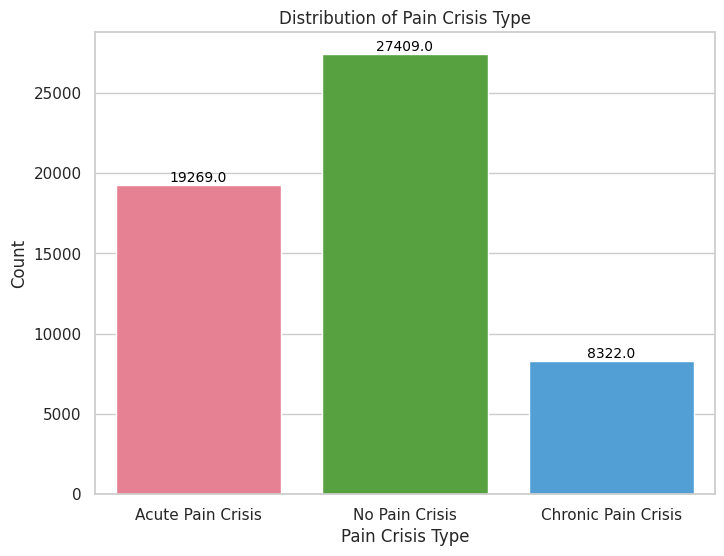

In [ ]:
# Plotting count plot for target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Pain_Crisis_Type', data=scd_df, palette='husl')  # Use 'husl' for unique colors
plt.title("Distribution of Pain Crisis Type")
plt.xlabel("Pain Crisis Type")
plt.ylabel("Count")

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Visualization showed that patients experienced `No Pain Crisis` often with a count of `27409`, followed by `Acute Pain Crisis` with a count of `19269` and `Chronic Pain Crisis` with a count of `8322`.  

This shows that our dataset is highly imbalanced we will need to fix it. We will use `SMOTE` vs `SMOTEK` at later stages to achieve this and balance our dataset.

## Numerical Feature Distributions

We are going to visualize key numerical features that are core clinical vitals when it comes to SCD monitoring

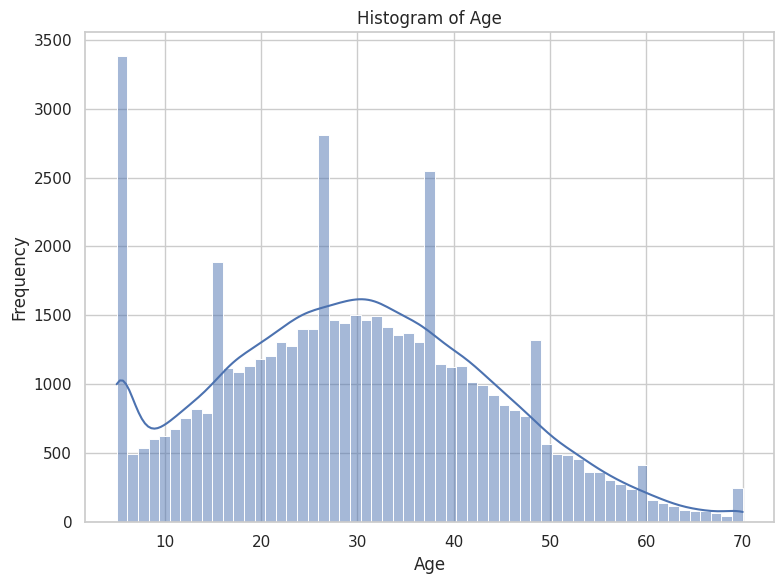

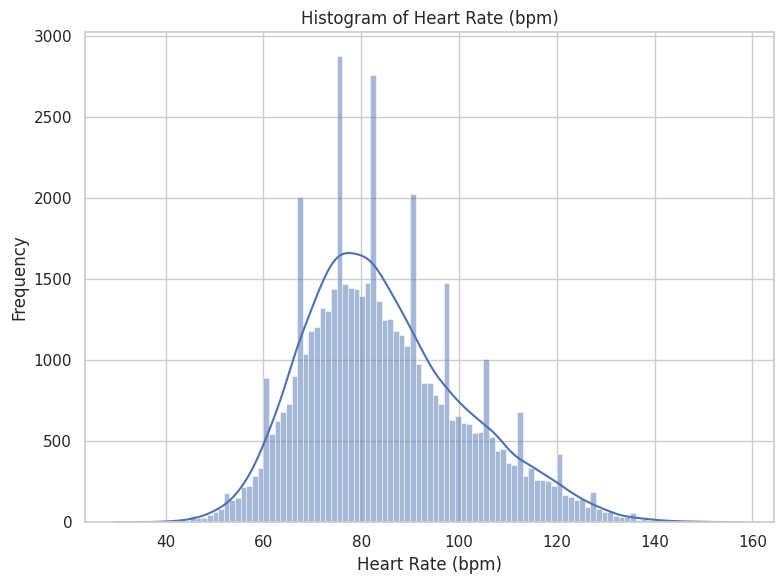

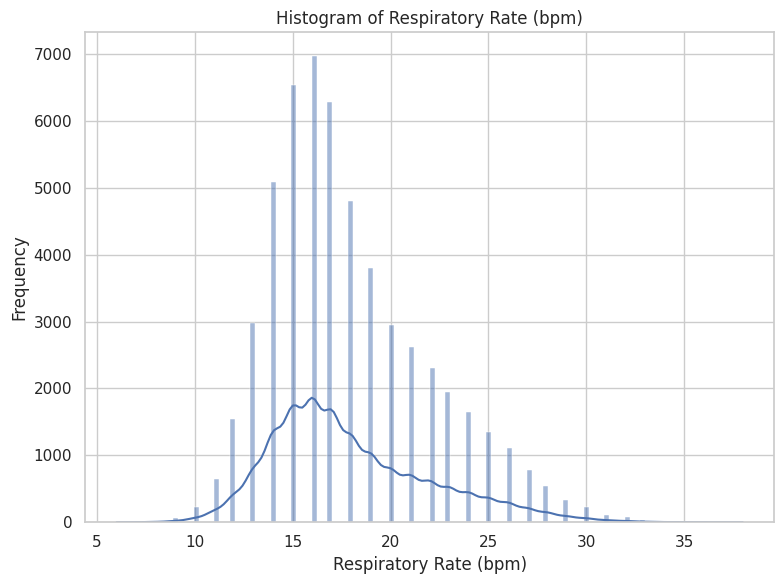

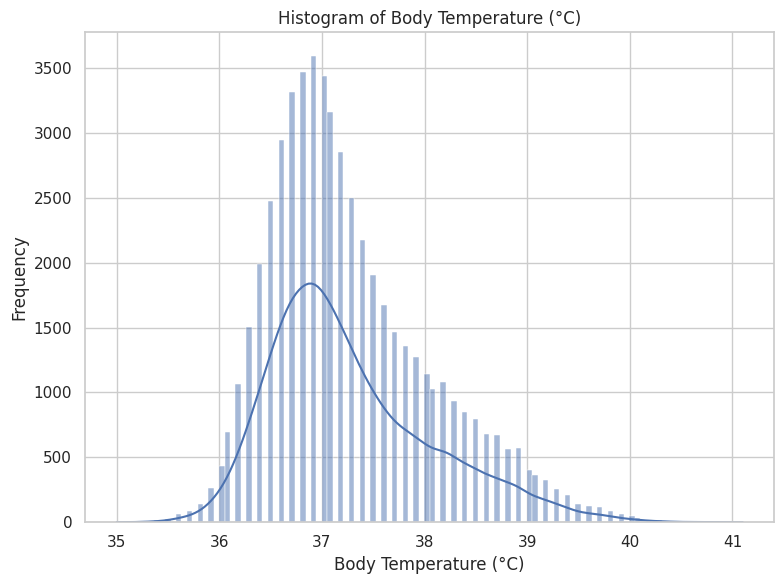

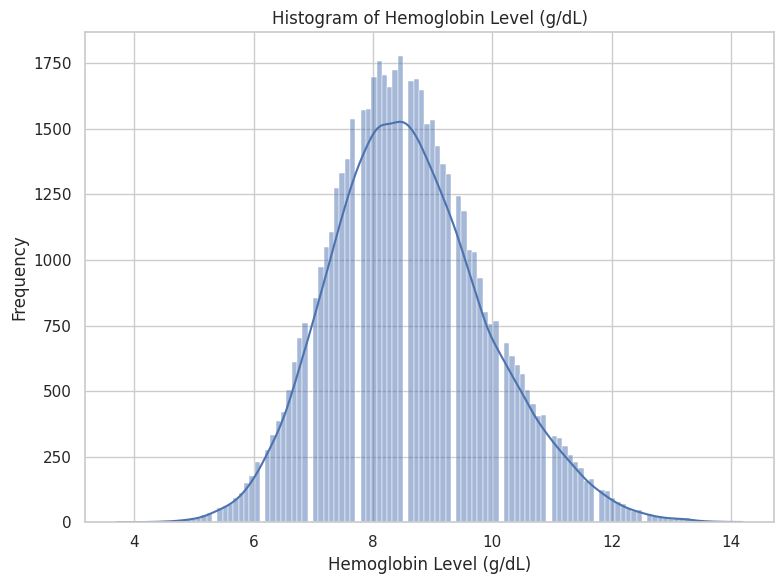

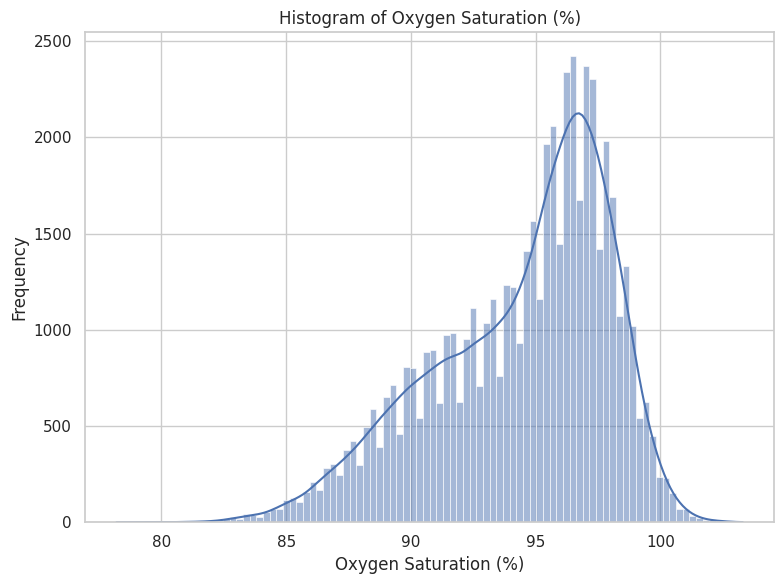

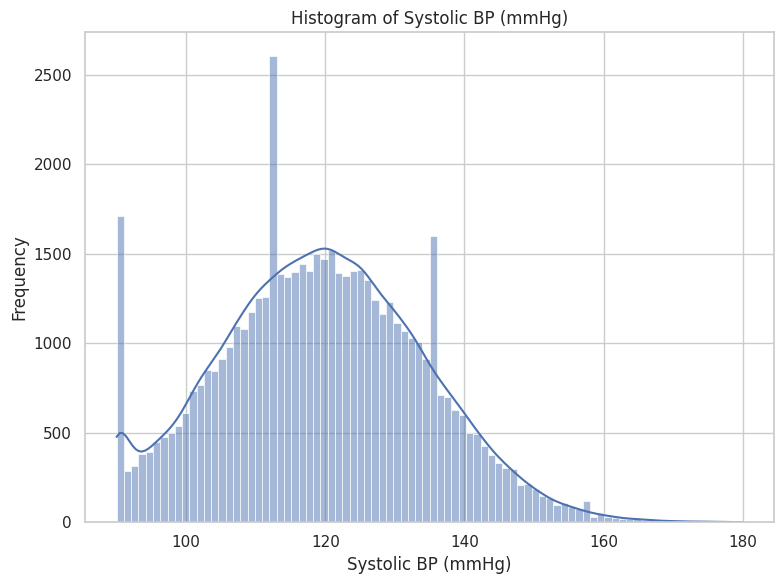

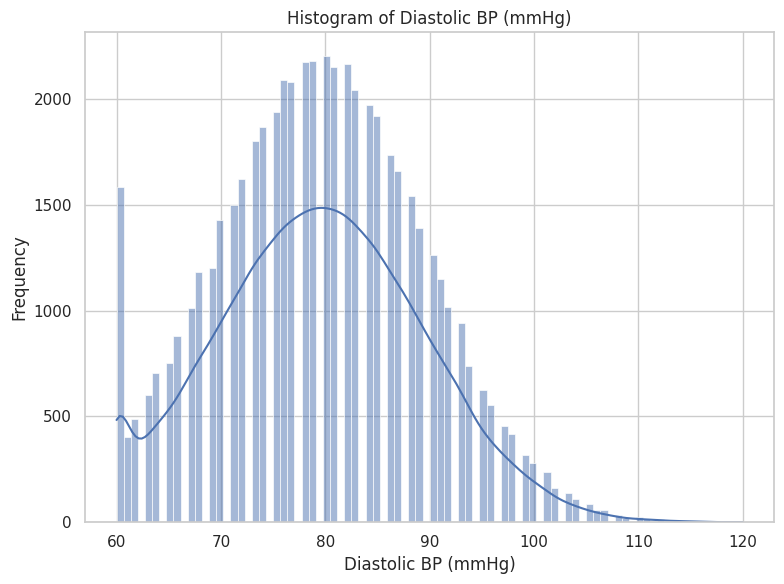

In [ ]:
num_features = ['Age', 'Heart Rate (bpm)', 'Respiratory Rate (bpm)',
                'Body Temperature (°C)', 'Hemoglobin Level (g/dL)',
                'Oxygen Saturation (%)', 'Systolic BP (mmHg)', 'Diastolic BP (mmHg)']

for feature in num_features:
    if feature in scd_df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(scd_df[feature].dropna(), kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the DataFrame. Skipping...")

All key vital metrics have a fairly normal distribution except `Oxygen Saturation (%)` which is skewed to the right. This observation is fairly normal since the higher the oxygen saturation of a patient, the better.

Now we visualize Pain and Crisis Metrics with a strip plot to understand what is happening on that end.

<ipython-input-10-f19a5bc59a89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Pain_Crisis_Type', y=feature, data=scd_df,


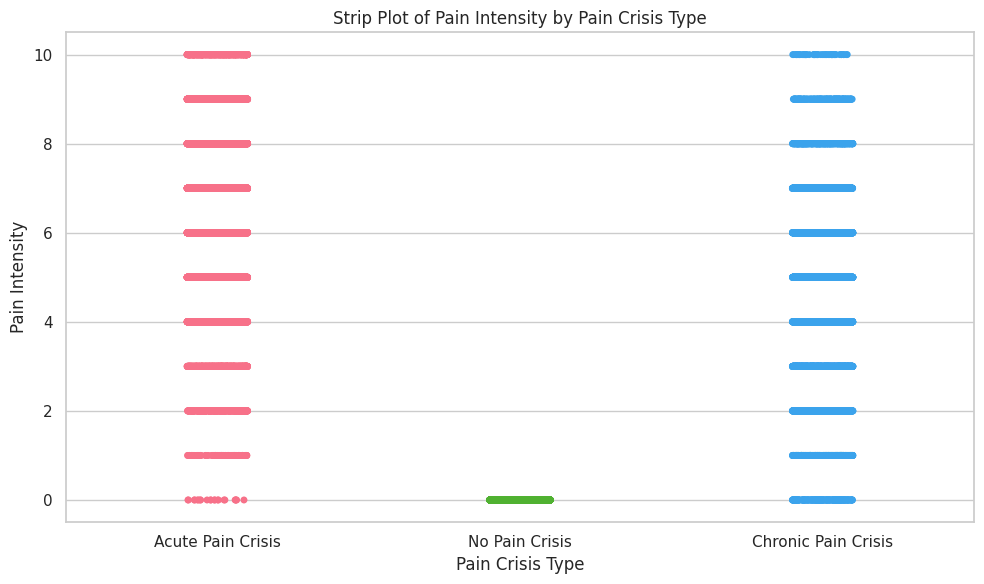

<ipython-input-10-f19a5bc59a89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Pain_Crisis_Type', y=feature, data=scd_df,


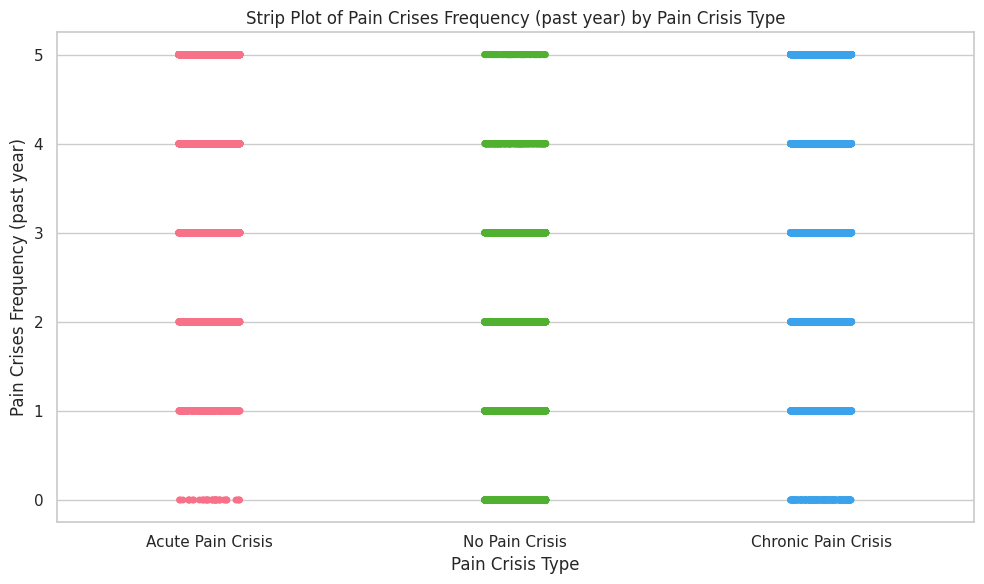

<ipython-input-10-f19a5bc59a89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Pain_Crisis_Type', y=feature, data=scd_df,


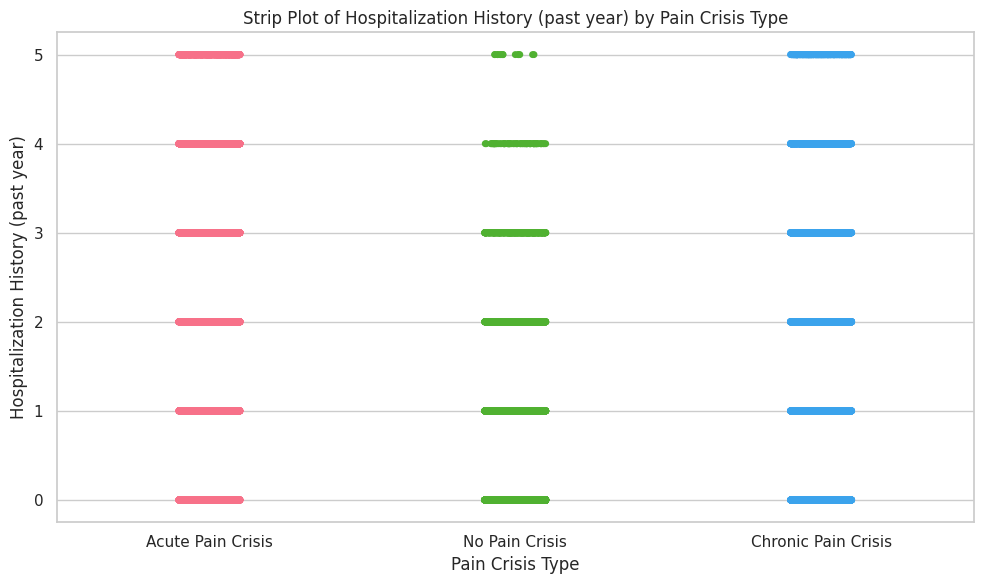

In [ ]:
features = ['Pain Intensity', 'Pain Crises Frequency (past year)', 'Hospitalization History (past year)']

# Create a swarm plot for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='Pain_Crisis_Type', y=feature, data=scd_df,
                  jitter=True, palette='husl')
    plt.title(f'Strip Plot of {feature} by Pain Crisis Type')
    plt.xlabel('Pain Crisis Type')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

Now, we group the data by Pain_Crisis_Type and calculate the average for the eight symptom severity indicators, then create a heatmap.

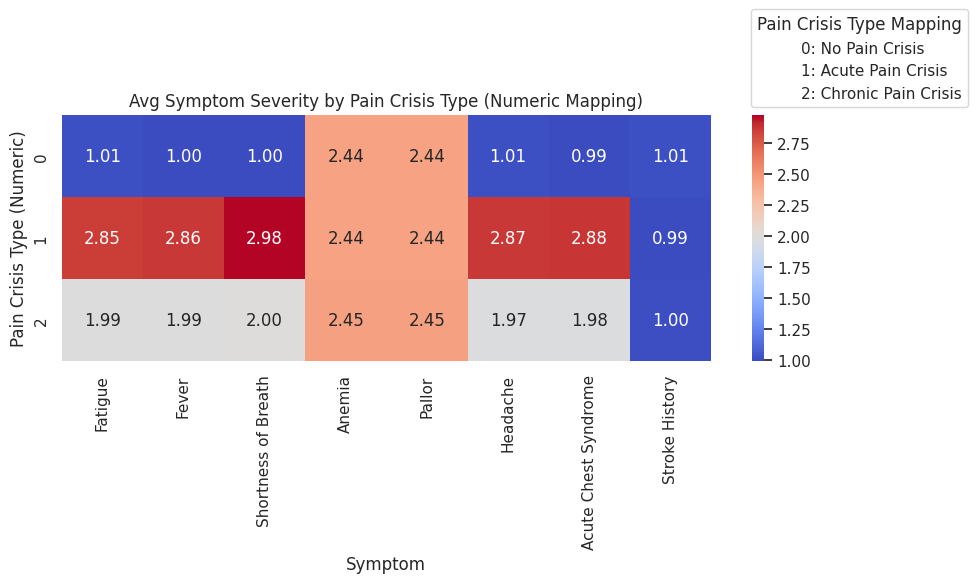

In [ ]:
# Define the mapping from long names to numeric values
mapping = {
    'No Pain Crisis': 0,
    'Acute Pain Crisis': 1,
    'Chronic Pain Crisis': 2
}
# Inverse mapping for legend labels
inv_mapping = {v: k for k, v in mapping.items()}

# Add a new column with the numeric values
scd_df['Crisis_Num'] = scd_df['Pain_Crisis_Type'].map(mapping)

# Define the symptom columns as given
symptom_cols = [
    'Fatigue', 'Fever', 'Shortness of Breath',
    'Anemia', 'Pallor', 'Headache',
    'Acute Chest Syndrome', 'Stroke History'
]

# Group by the numeric crisis type and compute the average severity for each symptom
heatmap_data = scd_df.groupby('Crisis_Num')[symptom_cols].mean()

# Create the heatmap; note that the y-axis now shows numbers (0,1,2)
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Avg Symptom Severity by Pain Crisis Type (Numeric Mapping)')
plt.xlabel('Symptom')
plt.ylabel('Pain Crisis Type (Numeric)')

# Build custom legend to communicate the mapping from numeric codes to full names
patches = [mpatches.Patch(color='none', label=f"{num}: {inv_mapping[num]}")
           for num in sorted(inv_mapping.keys())]
plt.legend(handles=patches, title="Pain Crisis Type Mapping", bbox_to_anchor=(1.05, 1), loc='lower left')

plt.tight_layout()
plt.show()

From the heat map we observe that on average when **Fatigue, Fever, Shortness of Breath, Headache, and Acute Chest Syndrome** are above 2.5 then the patient is likely experiencing an **Acute Pain crisis**.

When these symptoms fall between 1.5 to 2.0 then the patient is likely experiencing a Chronic Pain crisis. Howver. across all three Pain Crisis Type the average symptom severity remained the same for the symptoms of **Anemia and Pallor**. This observation is expected since pallor refers to the paleness of the skin and mucous membranes, which is a common symptom of anemia.

Also, people with sickle cell disease experience a chronic form of anemia due to the premature destruction of their sickle-shaped red blood cells.

## Categorical Feature Distributions

We will now visualize the distributions for features such as Gender, Ethnicity, SCD Genotype, and Pain Location.

<ipython-input-12-0b9ca6e8e8f3>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


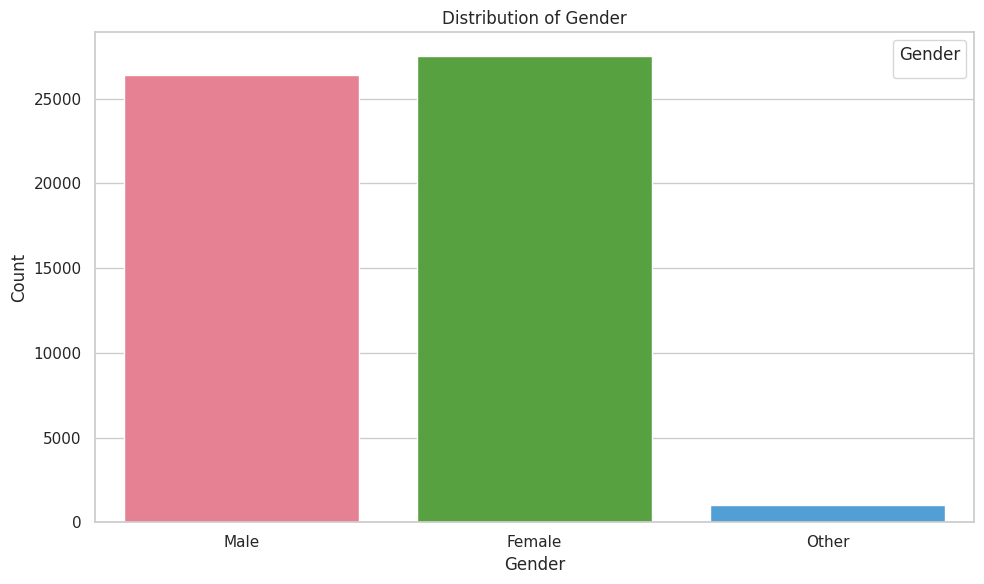

<ipython-input-12-0b9ca6e8e8f3>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


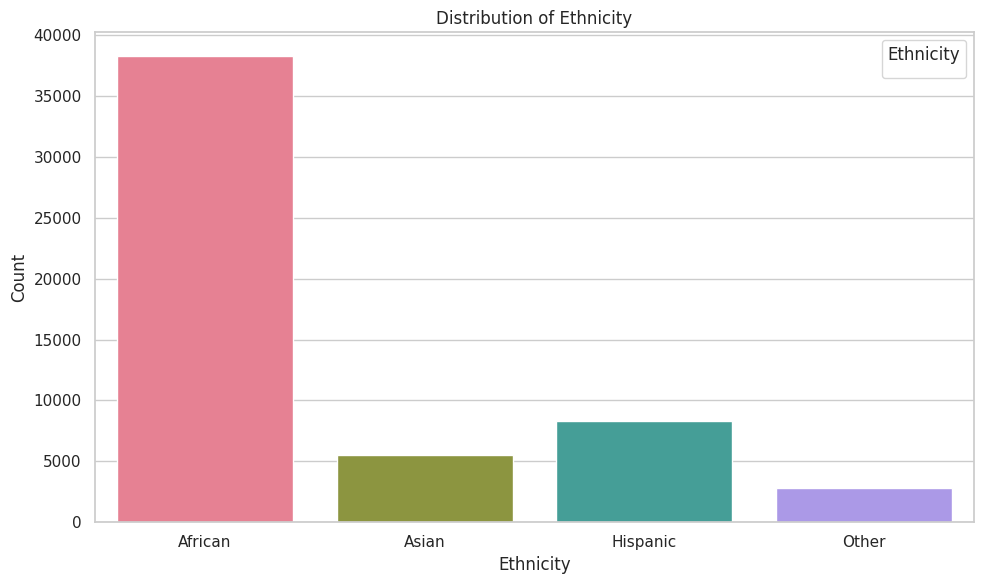

<ipython-input-12-0b9ca6e8e8f3>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=feature)


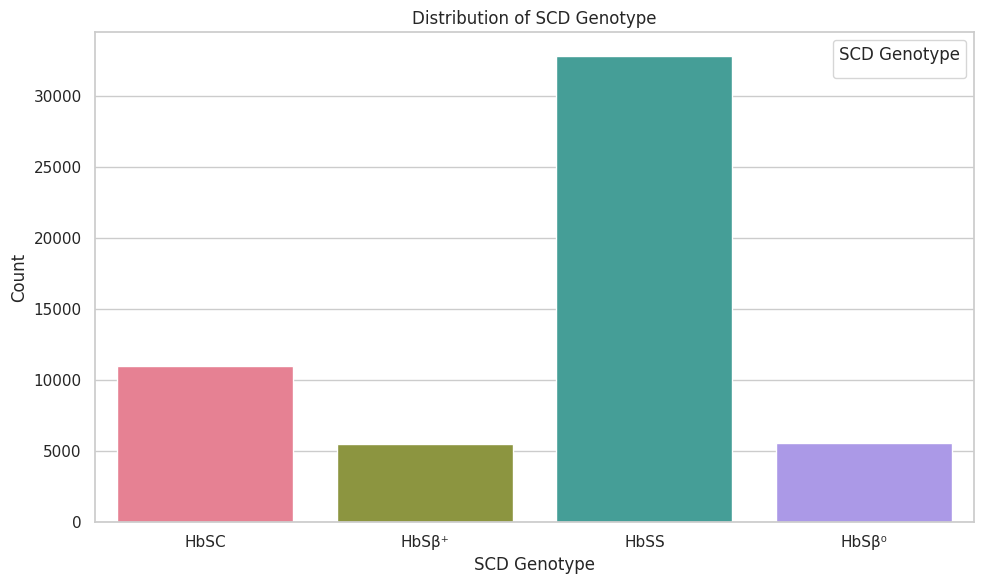

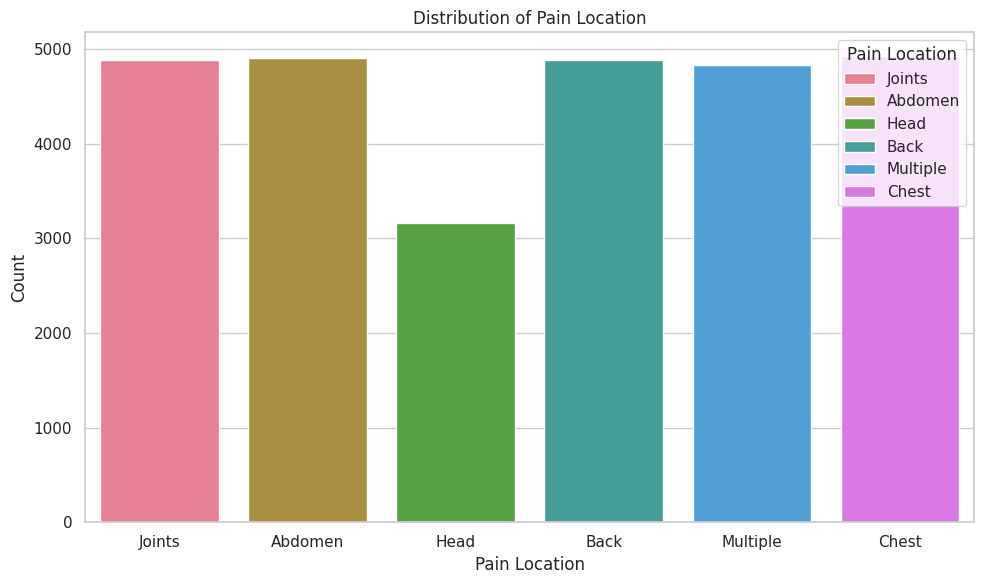

In [ ]:
cat_features = ['Gender', 'Ethnicity', 'SCD Genotype', 'Pain Location']

for feature in cat_features:
    if feature in scd_df.columns:
        plt.figure(figsize=(10, 6))
        # Setting hue to the same variable as x with dodge=False produces one bar per category
        ax = sns.countplot(x=feature, data=scd_df, hue=feature, dodge=False, palette='husl')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel("Count")
        # Add a legend that clearly communicates the category colors
        plt.legend(title=feature)
        plt.tight_layout()
        plt.show()

## Missing Value Analysis

We will look at columns with missing values and see how it look like:

In [ ]:
# Calculate missing values for each column
missing_values = scd_df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Patient ID                                 0
Age                                        0
Gender                                     0
Ethnicity                                  0
Weight (kg)                              550
Height (cm)                              550
SCD Genotype                               0
Heart Rate (bpm)                         550
Respiratory Rate (bpm)                     0
Body Temperature (°C)                    550
Systolic BP (mmHg)                         0
Diastolic BP (mmHg)                        0
Oxygen Saturation (%)                    550
Hemoglobin Level (g/dL)                    0
Pain Intensity                             0
Pain Location                          27409
Pain_Crisis_Type                           0
Fatigue                                    0
Nausea                                     0
Dizziness                                  0
Shortness of Breath                        0
Fever                       

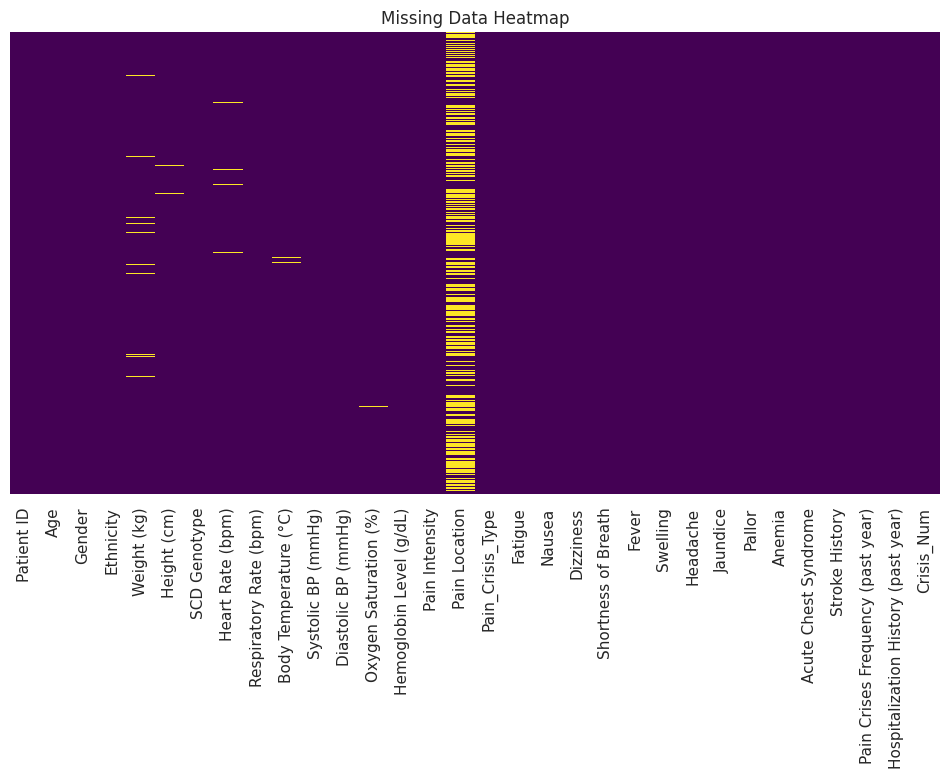

In [ ]:
# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(scd_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

As seen in the heat map **Pain Location** is the column with the most missing values. This as a result of `No Pain Crisis` having no pain location, so we will do a conditional imputation for this.

##  Correlation Analysis (Initial)

We are doing this at this stage to get a fair sense of how the future engineering step might look like for us

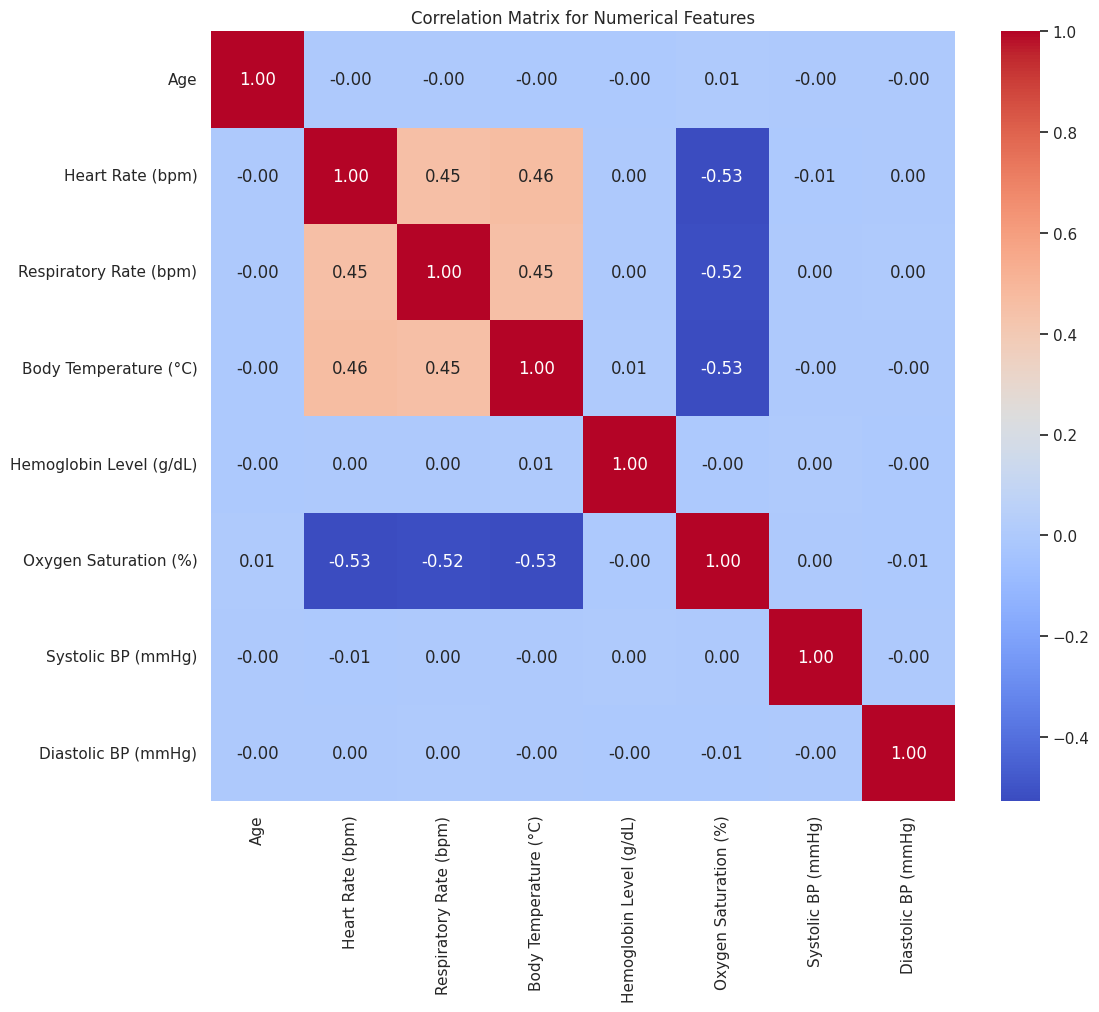

In [ ]:
# Compute correlation matrix on available numerical features
corr = scd_df[num_features].corr() if all(feature in scd_df.columns for feature in num_features) else scd_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

From the correlations we have seen, the feature engineering step looks promising.

## Relationships with Target Variable

We are examining relationships such as Heart Rate vs. Pain Crisis Type and Pain Location distribution per Pain Crisis Type.

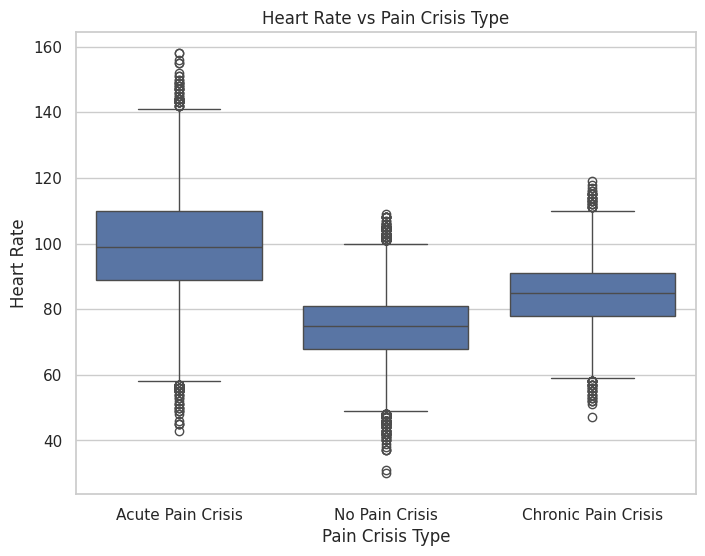

In [ ]:
# Example: Boxplot of Heart Rate vs Pain_Crisis_Type
if 'Heart Rate (bpm)' in scd_df.columns and 'Pain_Crisis_Type' in scd_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Pain_Crisis_Type', y='Heart Rate (bpm)', data=scd_df)
    plt.title("Heart Rate vs Pain Crisis Type")
    plt.xlabel("Pain Crisis Type")
    plt.ylabel("Heart Rate")
    plt.show()

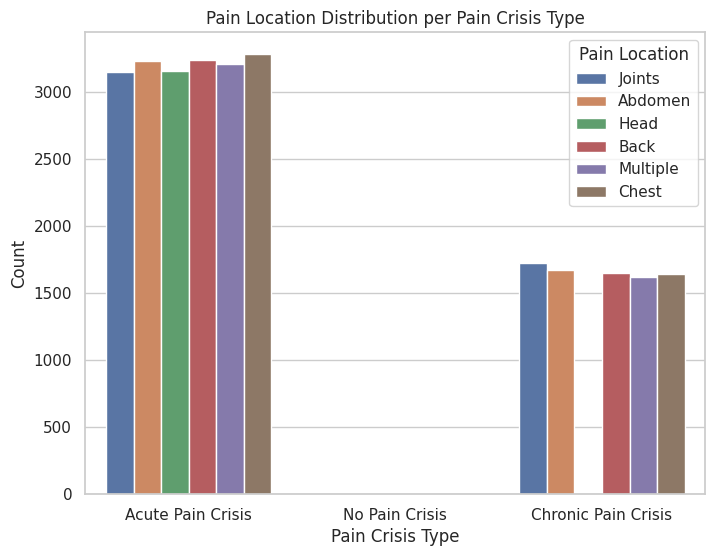

In [ ]:
# Example: Count plot showing Pain Location distribution per Pain Crisis Type
if 'Pain Location' in scd_df.columns and 'Pain_Crisis_Type' in scd_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Pain_Crisis_Type', hue='Pain Location', data=scd_df)
    plt.title("Pain Location Distribution per Pain Crisis Type")
    plt.xlabel("Pain Crisis Type")
    plt.ylabel("Count")
    plt.show()

## Data Cleaning

The descriptive statistics and the visualization of key columns revealed the data is fairly normal. So we don't have much cleaning to do, we only drop `Patient ID` at this stage.

In [ ]:
scd_df = scd_df.drop(columns=['Patient ID'], errors='ignore')

In [ ]:
# sanity check
scd_df.head()

,Age,Gender,Ethnicity,Weight (kg),Height (cm),SCD Genotype,Heart Rate (bpm),Respiratory Rate (bpm),Body Temperature (°C),Systolic BP (mmHg),...,Swelling,Headache,Jaundice,Pallor,Anemia,Acute Chest Syndrome,Stroke History,Pain Crises Frequency (past year),Hospitalization History (past year),Crisis_Num
0,37,Male,African,56.2,160.3,HbSC,78.0,16,39.4,98,...,2,3,5,1,1,2,0,5,1,1
1,27,Female,African,89.3,183.3,HbSβ⁺,77.0,17,36.8,118,...,2,0,1,1,1,2,2,1,0,0
2,39,Male,African,65.3,170.0,HbSS,81.0,17,36.9,140,...,0,4,0,1,1,3,0,4,3,2
3,52,Female,African,76.2,158.4,HbSC,126.0,15,37.7,121,...,1,1,0,1,1,1,1,5,3,1
4,26,Male,African,78.8,186.3,HbSβ⁰,67.0,13,37.4,121,...,1,1,0,1,1,0,0,0,0,0


## Imputation

Now, we are ready to impute missing values. We will do this for both categorical and numerical columns.

We will first do a `Conditional Imputation` for the `Pain Location` Column.

In [ ]:
# Inspect the Pain_Crisis_Type vs missing Pain Location
print("Number of missing Pain Location values:", scd_df['Pain Location'].isnull().sum())
print("Distribution of Pain_Crisis_Type for missing Pain Location:")
print(scd_df[scd_df['Pain Location'].isnull()]['Pain_Crisis_Type'].value_counts())

Number of missing Pain Location values: 27409
Distribution of Pain_Crisis_Type for missing Pain Location:
Pain_Crisis_Type
No Pain Crisis    27409
Name: count, dtype: int64


In [ ]:
# Replace missing Pain Location with "No Pain" for rows with 'No Pain Crisis'
scd_df['Pain Location'] = scd_df.apply(
    lambda row: 'No Pain'
        if pd.isnull(row['Pain Location']) and row['Pain_Crisis_Type'] == 'No Pain Crisis'
        else row['Pain Location'],
    axis=1
)

In [ ]:
# Check if there are still missing values in Pain Location where Pain_Crisis_Type != "No Pain Crisis"
remaining_missing = scd_df[(pd.isnull(scd_df['Pain Location'])) & (scd_df['Pain_Crisis_Type'] != 'No Pain Crisis')]
print("Remaining missing Pain Location values in rows with pain crisis:", remaining_missing.shape[0])

Remaining missing Pain Location values in rows with pain crisis: 0


Our conditional Imputation worked, and now we are good to go.

Now we do the KNN Imputation

In [ ]:
# ===============================
# Step 1. Impute Numerical Features
# ===============================

# Identify numerical columns (using both int64 and float64 dtypes)
num_cols = scd_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Optionally, you might verify if some numerical columns are known to be complete;
# but here, we impute all numerical columns.
knn_imputer_num = KNNImputer(n_neighbors=5)
scd_df[num_cols] = knn_imputer_num.fit_transform(scd_df[num_cols])

In [ ]:
# ===============================
# Step 2. Impute Categorical Features
# ===============================

# Define categorical columns that need imputation
cat_cols = ['Gender', 'Ethnicity', 'SCD Genotype', 'Pain Location', 'Pain_Crisis_Type']

# Extract the subset of the DataFrame with these categorical variables
cat_data = scd_df[cat_cols].copy()

# Convert categorical features into ordinal (integer) representation.
# Missing values will be left as np.nan.
ord_enc = OrdinalEncoder()
cat_encoded = ord_enc.fit_transform(cat_data)

cat_encoded

# Apply KNN imputation on the ordinal encoded values
knn_imputer_cat = KNNImputer(n_neighbors=5)
cat_imputed = knn_imputer_cat.fit_transform(cat_encoded)

# Since the imputer returns continuous values, round to the nearest integer
cat_imputed_rounded = np.round(cat_imputed).astype(int)

# Convert the imputed ordinal codes back to original category labels.
cat_imputed_df = pd.DataFrame(cat_imputed_rounded, columns=cat_cols)
for i, col in enumerate(cat_cols):
    # For each categorical column, use the categories_ attribute from OrdinalEncoder
    # to map integer codes back to the original labels.
    cat_imputed_df[col] = cat_imputed_df[col].apply(
        lambda x: ord_enc.categories_[i][x] if x < len(ord_enc.categories_[i]) else np.nan
    )

# Replace the original categorical columns with the imputed values.
scd_df[cat_cols] = cat_imputed_df

In [ ]:
# ===============================
# Verifying Imputation Results
# ===============================
print("Missing values (numerical features) after imputation:")
print(scd_df[num_cols].isnull().sum())

print("\nMissing values (categorical features) after imputation:")
print(scd_df[cat_cols].isnull().sum())

Missing values (numerical features) after imputation:
Age                                    0
Weight (kg)                            0
Height (cm)                            0
Heart Rate (bpm)                       0
Respiratory Rate (bpm)                 0
Body Temperature (°C)                  0
Systolic BP (mmHg)                     0
Diastolic BP (mmHg)                    0
Oxygen Saturation (%)                  0
Hemoglobin Level (g/dL)                0
Pain Intensity                         0
Fatigue                                0
Nausea                                 0
Dizziness                              0
Shortness of Breath                    0
Fever                                  0
Swelling                               0
Headache                               0
Jaundice                               0
Pallor                                 0
Anemia                                 0
Acute Chest Syndrome                   0
Stroke History                         0
Pai

We will not do encoding now for reasons of wanting to bin and create new features along the way.

# Feature Engineering & Feature Selection

## Binning Features
The goal of this project is to have a clinical interpretable model. Therefore we are going to bin some columns for these justifications:


1.   **Clinical Interpretability:** Binning will highlight meaningful clinical thresholds (for example, pediatric vs. adult ages, or normal vs. abnormal vital sign ranges) which can be very interpretable by healthcare professionals. For instance, rather than using raw temperatures, having bins like “Hypothermia,” “Normal,” and “Fever” can provide clinical insights.
2.   **Non-Linear Effects:** Given that the relationship between a continuous variable and the pain crisis outcome isn’t strictly linear (for instance, a sharp change in risk when heart rate crosses a threshold), then binning will allow us to capture these threshold effects.
3.  **Reduction of Outlier Influence:** Binning will reduce the impact of extreme values by grouping them into broader categories. This is especially useful if outliers do not carry critical additional information beyond a certain point-given we have 55000 data points.



In [ ]:
# 1. Age: Categorize into Child, Young Adult, Middle Aged, Senior
scd_df['Age_Binned'] = pd.cut(
    scd_df['Age'],
    bins=[0, 18, 40, 65, 120],
    labels=["Child (<18)", "Young Adult (18-40)", "Middle Aged (40-65)", "Senior (>65)"],
    right=False
)

# 2. Body Temperature (°C): Categories for Hypothermia, Normal, and Fever
scd_df['BodyTemp_Binned'] = pd.cut(
    scd_df['Body Temperature (°C)'],
    bins=[0, 35, 37.5, 50],  # Upper bound of 50°C is arbitrary, assuming no patient exceeds this.
    labels=["Hypothermia (<35°C)", "Normal (35-37.5°C)", "Fever (>37.5°C)"],
    right=False
)

# 3. Systolic BP (mmHg): Using standard clinical cutoffs
scd_df['SystolicBP_Binned'] = pd.cut(
    scd_df['Systolic BP (mmHg)'],
    bins=[0, 90, 120, 140, np.inf],
    labels=["Low (<90)", "Normal (90-120)", "Prehypertension (120-140)", "Hypertension (>140)"],
    right=False
)

# 4. Diastolic BP (mmHg): Defined with lower, normal, and high ranges
scd_df['DiastolicBP_Binned'] = pd.cut(
    scd_df['Diastolic BP (mmHg)'],
    bins=[0, 60, 80, np.inf],
    labels=["Low (<60)", "Normal (60-80)", "High (>80)"],
    right=False
)

# 5. Heart Rate (bpm): Based on bradycardia, normal, and tachycardia thresholds
scd_df['HeartRate_Binned'] = pd.cut(
    scd_df['Heart Rate (bpm)'],
    bins=[0, 60, 100, np.inf],
    labels=["Bradycardia (<60 bpm)", "Normal (60-100 bpm)", "Tachycardia (>100 bpm)"],
    right=False
)

# 6. Respiratory Rate (bpm): Categorizing based on known respiratory thresholds
scd_df['RespiratoryRate_Binned'] = pd.cut(
    scd_df['Respiratory Rate (bpm)'],
    bins=[0, 12, 20, np.inf],
    labels=["Bradypnea (<12 bpm)", "Normal (12-20 bpm)", "Tachypnea (>20 bpm)"],
    right=False
)

# 7. Hemoglobin Level (g/dL): Creating categories that reflect severity of anemia
scd_df['Hemoglobin_Binned'] = pd.cut(
    scd_df['Hemoglobin Level (g/dL)'],
    bins=[0, 7, 9, np.inf],
    labels=["Severely Low (<7 g/dL)", "Moderate (7-9 g/dL)", "Relatively High (>=9 g/dL)"],
    right=False
)

Now let's visualize the value counts in this new bins

In [ ]:
print("Age Binned:")
print(scd_df['Age_Binned'].value_counts(), "\n")

print("Body Temperature Binned:")
print(scd_df['BodyTemp_Binned'].value_counts(), "\n")

print("Systolic BP Binned:")
print(scd_df['SystolicBP_Binned'].value_counts(), "\n")

print("Diastolic BP Binned:")
print(scd_df['DiastolicBP_Binned'].value_counts(), "\n")

print("Heart Rate Binned:")
print(scd_df['HeartRate_Binned'].value_counts(), "\n")

print("Respiratory Rate Binned:")
print(scd_df['RespiratoryRate_Binned'].value_counts(), "\n")

print("Hemoglobin Level Binned:")
print(scd_df['Hemoglobin_Binned'].value_counts(), "\n")

Age Binned:
Age_Binned
Young Adult (18-40)    29337
Middle Aged (40-65)    13439
Child (<18)            11695
Senior (>65)             529
Name: count, dtype: int64 

Body Temperature Binned:
BodyTemp_Binned
Normal (35-37.5°C)     36600
Fever (>37.5°C)        18400
Hypothermia (<35°C)        0
Name: count, dtype: int64 

Systolic BP Binned:
SystolicBP_Binned
Normal (90-120)              27707
Prehypertension (120-140)    22337
Hypertension (>140)           4956
Low (<90)                        0
Name: count, dtype: int64 

Diastolic BP Binned:
DiastolicBP_Binned
High (>80)        27517
Normal (60-80)    27483
Low (<60)             0
Name: count, dtype: int64 

Heart Rate Binned:
HeartRate_Binned
Normal (60-100 bpm)       42851
Tachycardia (>100 bpm)    10292
Bradycardia (<60 bpm)      1857
Name: count, dtype: int64 

Respiratory Rate Binned:
RespiratoryRate_Binned
Normal (12-20 bpm)     37992
Tachypnea (>20 bpm)    16049
Bradypnea (<12 bpm)      959
Name: count, dtype: int64 

Hemoglob

Now, we will drop the old columns and assign them to their names to the new ones

In [ ]:
# List of continuous columns that have been binned and now need to be dropped.
columns_to_drop = [
    'Age',
    'Body Temperature (°C)',
    'Systolic BP (mmHg)',
    'Diastolic BP (mmHg)',
    'Heart Rate (bpm)',
    'Respiratory Rate (bpm)',
    'Hemoglobin Level (g/dL)'
]

# Create a new DataFrame by dropping the original unbinned features
scd_df = scd_df.drop(columns=columns_to_drop)

# Define a mapping to rename the binned columns back to their original names
rename_mapping = {
    'Age_Binned': 'Age',
    'BodyTemp_Binned': 'Body Temperature (°C)',
    'SystolicBP_Binned': 'Systolic BP (mmHg)',
    'DiastolicBP_Binned': 'Diastolic BP (mmHg)',
    'HeartRate_Binned': 'Heart Rate (bpm)',
    'RespiratoryRate_Binned': 'Respiratory Rate (bpm)',
    'Hemoglobin_Binned': 'Hemoglobin Level (g/dL)'
}

# Rename the binned columns to use the original column names
scd_df.rename(columns=rename_mapping, inplace=True)

# Display the columns to verify the changes
print("Columns after dropping unbinned features and renaming binned features:")
scd_df.columns

Columns after dropping unbinned features and renaming binned features:


Index(['Gender', 'Ethnicity', 'Weight (kg)', 'Height (cm)', 'SCD Genotype',
       'Oxygen Saturation (%)', 'Pain Intensity', 'Pain Location',
       'Pain_Crisis_Type', 'Fatigue', 'Nausea', 'Dizziness',
       'Shortness of Breath', 'Fever', 'Swelling', 'Headache', 'Jaundice',
       'Pallor', 'Anemia', 'Acute Chest Syndrome', 'Stroke History',
       'Pain Crises Frequency (past year)',
       'Hospitalization History (past year)', 'Crisis_Num', 'Age',
       'Body Temperature (°C)', 'Systolic BP (mmHg)', 'Diastolic BP (mmHg)',
       'Heart Rate (bpm)', 'Respiratory Rate (bpm)',
       'Hemoglobin Level (g/dL)'],
      dtype='object')

## Encoding

The encoding strategy we are employing is this,


*   One-Hot Encoding for nominal (unranked) categories
*   Ordinal Encoding  for ordinal (ranked) categories



In [ ]:
# ------------------------------------
# Step 1: Encode Ordinal (Binned) Features
# ------------------------------------
# Define the clinical order for each ordinal (binned) column:

# Age bins: these are clinically informed age groups
age_order = ["Child (<18)", "Young Adult (18-40)", "Middle Aged (40-65)", "Senior (>65)"]

# Body Temperature (°C) bins:
body_temp_order = ["Hypothermia (<35°C)", "Normal (35-37.5°C)", "Fever (>37.5°C)"]

# Systolic BP (mmHg) bins:
systolic_bp_order = ["Low (<90)", "Normal (90-120)", "Prehypertension (120-140)", "Hypertension (>140)"]

# Diastolic BP (mmHg) bins:
diastolic_bp_order = ["Low (<60)", "Normal (60-80)", "High (>80)"]

# Heart Rate (bpm) bins:
heart_rate_order = ["Bradycardia (<60 bpm)", "Normal (60-100 bpm)", "Tachycardia (>100 bpm)"]

# Respiratory Rate (bpm) bins:
resp_rate_order = ["Bradypnea (<12 bpm)", "Normal (12-20 bpm)", "Tachypnea (>20 bpm)"]

# Hemoglobin Level (g/dL) bins:
hemoglobin_order = ["Severely Low (<7 g/dL)", "Moderate (7-9 g/dL)", "Relatively High (>=9 g/dL)"]

In [ ]:
# Create a dictionary mapping each ordinal column to its order.
ordinal_feature_order = {
    'Age': age_order,
    'Body Temperature (°C)': body_temp_order,
    'Systolic BP (mmHg)': systolic_bp_order,
    'Diastolic BP (mmHg)': diastolic_bp_order,
    'Heart Rate (bpm)': heart_rate_order,
    'Respiratory Rate (bpm)': resp_rate_order,
    'Hemoglobin Level (g/dL)': hemoglobin_order
}

# For each ordinal column, convert it to a pandas Categorical with ordering.
for col, order in ordinal_feature_order.items():
    scd_df[col] = pd.Categorical(scd_df[col], categories=order, ordered=True)

# Apply Ordinal Encoding: this will convert the ordered categories to numeric codes
ord_enc = OrdinalEncoder()
ordinal_cols = list(ordinal_feature_order.keys())
scd_df[ordinal_cols] = ord_enc.fit_transform(scd_df[ordinal_cols])


In [ ]:
# ------------------------------------
# Step 2: One-Hot Encode the Nominal Features
# ------------------------------------
# The nominal (unranked) features to be one-hot encoded.
nominal_features = ['Gender', 'Ethnicity', 'SCD Genotype', 'Pain Location']

# Using pandas get_dummies with drop_first=True to help mitigate multicollinearity.
scd_df = pd.get_dummies(scd_df, columns=nominal_features, drop_first=True)

In [ ]:
# ------------------------------------
# Step 3: Verify the Final Encoded DataFrame
# ------------------------------------
print("Encoded DataFrame columns:")
scd_df.columns

Encoded DataFrame columns:


Index(['Weight (kg)', 'Height (cm)', 'Oxygen Saturation (%)', 'Pain Intensity',
       'Pain_Crisis_Type', 'Fatigue', 'Nausea', 'Dizziness',
       'Shortness of Breath', 'Fever', 'Swelling', 'Headache', 'Jaundice',
       'Pallor', 'Anemia', 'Acute Chest Syndrome', 'Stroke History',
       'Pain Crises Frequency (past year)',
       'Hospitalization History (past year)', 'Crisis_Num', 'Age',
       'Body Temperature (°C)', 'Systolic BP (mmHg)', 'Diastolic BP (mmHg)',
       'Heart Rate (bpm)', 'Respiratory Rate (bpm)', 'Hemoglobin Level (g/dL)',
       'Gender_Male', 'Gender_Other', 'Ethnicity_Asian', 'Ethnicity_Hispanic',
       'Ethnicity_Other', 'SCD Genotype_HbSS', 'SCD Genotype_HbSβ⁰',
       'SCD Genotype_HbSβ⁺', 'Pain Location_Back', 'Pain Location_Chest',
       'Pain Location_Head', 'Pain Location_Joints', 'Pain Location_Multiple',
       'Pain Location_No Pain'],
      dtype='object')

In [ ]:
print("\nSample of the encoded data:")
scd_df.head()


Sample of the encoded data:


,Weight (kg),Height (cm),Oxygen Saturation (%),Pain Intensity,Pain_Crisis_Type,Fatigue,Nausea,Dizziness,Shortness of Breath,Fever,...,Ethnicity_Other,SCD Genotype_HbSS,SCD Genotype_HbSβ⁰,SCD Genotype_HbSβ⁺,Pain Location_Back,Pain Location_Chest,Pain Location_Head,Pain Location_Joints,Pain Location_Multiple,Pain Location_No Pain
0,56.2,160.3,86.4,5.0,Acute Pain Crisis,5.0,1.0,5.0,4.0,4.0,...,False,False,False,False,False,False,False,True,False,False
1,89.3,183.3,97.9,0.0,No Pain Crisis,4.0,0.0,1.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,True
2,65.3,170.0,91.1,2.0,Chronic Pain Crisis,2.0,2.0,4.0,0.0,5.0,...,False,True,False,False,False,False,False,False,False,False
3,76.2,158.4,96.8,5.0,Acute Pain Crisis,5.0,3.0,0.0,1.0,2.0,...,False,False,False,False,False,False,True,False,False,False
4,78.8,186.3,95.9,0.0,No Pain Crisis,1.0,0.0,0.0,0.0,1.0,...,False,False,True,False,False,False,False,False,False,True


## Feature Engineering

We introduce two new features here.

We derive BMI from Weight (kg) and Height (cm) using the standard formula. Since height is given in centimeters, we convert it to meters first.

We create an interaction between Age and Pain Crises Frequency (past year).
(Note: Since Age is already binned and ordinal encoded from EDA, its numeric codes will be used in the multiplication.)

These features are binned to capture discrete categories, which is far better.

In [ ]:
# -------------------------------
# Step 1: Create and Bin BMI
# -------------------------------

# Calculate BMI using Weight (kg) and Height (cm)
scd_df['BMI'] = scd_df['Weight (kg)'] / ((scd_df['Height (cm)'] / 100) ** 2)

# Bin BMI into clinically meaningful categories
bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = ['Underweight (<18.5)', 'Normal (18.5-25)', 'Overweight (25-30)', 'Obesity (>=30)']
scd_df['BMI_Binned'] = pd.cut(scd_df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [ ]:
# -------------------------------
# Step 2: Create and Bin the Interaction Term
# -------------------------------
# Interaction: Age (ordinal encoded at this stage) * Pain Crises Frequency (past year)
# Note: The 'Age' here is already ordinal encoded from Phase 1.
scd_df['Age_PainCrises_Interaction'] = scd_df['Age'] * scd_df['Pain Crises Frequency (past year)']

In [ ]:
# -------------------------------
# Step 3: Drop Raw Height and Weight (and BMI, if you now exclusively use the binned version)
# -------------------------------
# Given that BMI is now binned, you can drop the original 'Weight (kg)', 'Height (cm)', and even the continuous 'BMI' column if desired.
scd_df.drop(columns=['Weight (kg)', 'Height (cm)', 'BMI'], inplace=True)

# rename BMI_Binned to BMI inplace
scd_df.rename(columns={'BMI_Binned': 'BMI'}, inplace=True)

In [ ]:
# -------------------------------
# Step 4: Ordinal Encoding for the Binned Variables
# -------------------------------

# Define the order for the binned BMI and interaction term:
bmi_order = ['Underweight (<18.5)', 'Normal (18.5-25)', 'Overweight (25-30)', 'Obesity (>=30)']
# Convert these columns to ordered categorical types:
scd_df['BMI'] = pd.Categorical(scd_df['BMI'], categories=bmi_order, ordered=True)

# Use OrdinalEncoder to encode these ordinal features numerically.
ord_enc = OrdinalEncoder()
scd_df[['BMI']] = ord_enc.fit_transform(scd_df[['BMI']])

In [ ]:
print(scd_df[['BMI', 'Age_PainCrises_Interaction']].head())

   BMI  Age_PainCrises_Interaction
0  0.0                        15.0
1  2.0                         3.0
2  0.0                        12.0
3  1.0                         5.0
4  0.0                         0.0


## Correlation-Based Feature Selection
Here we recompute the correlation matrix on the numerical (including engineered) features to identify highly correlated pairs.

In [ ]:
# Selecting numeric columns (this includes both original and newly engineered numerical features)
num_features = scd_df.select_dtypes(include=[np.number]).columns
# Compute and display the correlation matrix
corr_matrix = scd_df[num_features].corr()


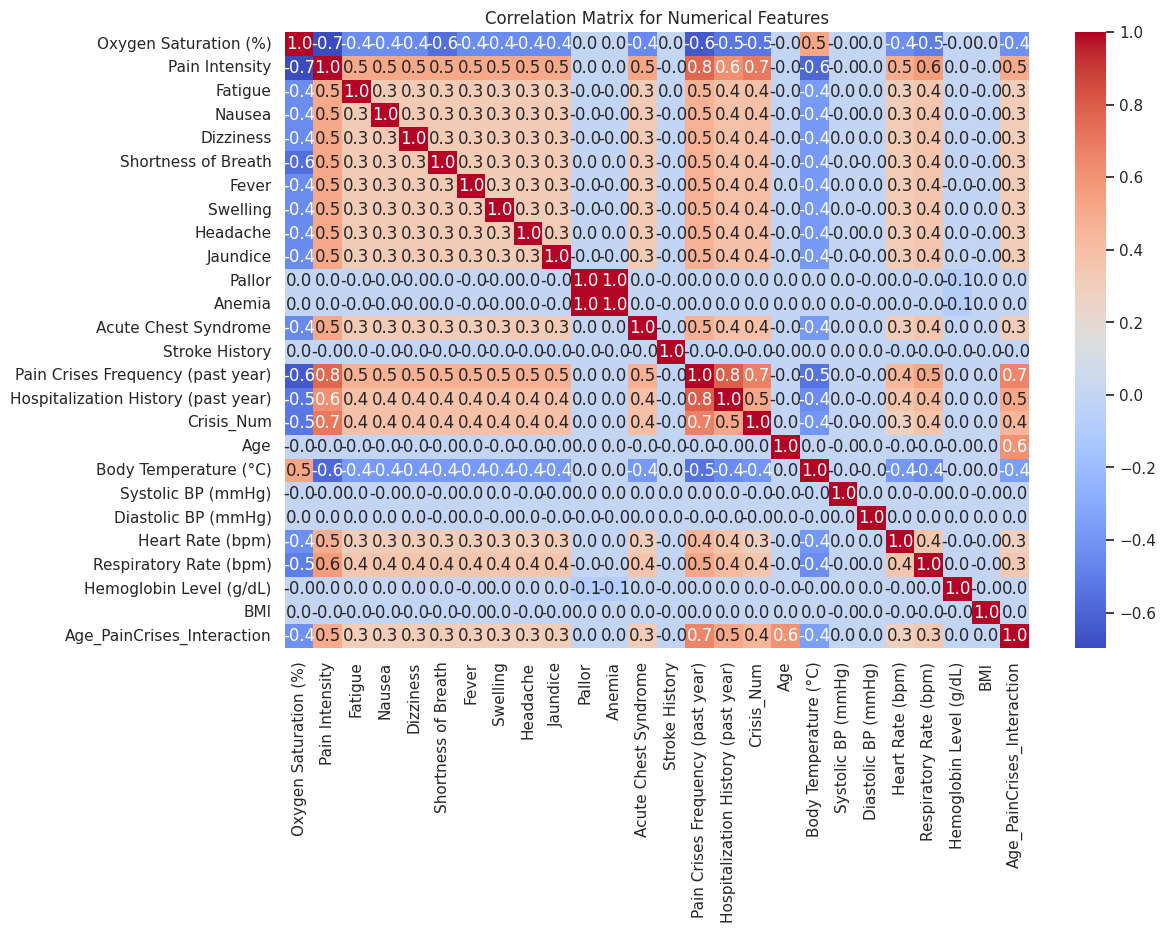

In [ ]:
# visualizing the corr matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [ ]:
# get the correlation for the target column which is Crisis_Num
crisis_corr = corr_matrix.loc['Crisis_Num']
crisis_corr

,Crisis_Num
Oxygen Saturation (%),-0.525355
Pain Intensity,0.706759
Fatigue,0.387135
Nausea,0.389142
Dizziness,0.392978
Shortness of Breath,0.388379
Fever,0.392232
Swelling,0.387503
Headache,0.387606
Jaundice,0.390416


From the correlation matrix of our target variable which we have encoded to `Cris_Num`, we observe the following correlations.

`Cris_Num` cris is strongly and positively correlated with;

* Pain Intensity --> 0.706759
* Pain Crises Frequency (past year)	--> 0.670179
* Hospitalization History (past year)	--> 0.522000

moderately and positively correlated with;

* Fatigue	--> 0.387135
* Nausea -->	0.389142
* Dizziness -->	0.392978
* Shortness of Breath -->	0.388379
* Fever -->	0.392232
* Swelling -->	0.387503
* Headache -->	0.387606
* Jaundice -->	0.390416

strongly and negative correation with;

* Oxygen Saturation (%)	--> -0.525355
* Body Temperature (°C) -->	-0.396428

Hopefully these features show up when we do the feature importance to understand which top features we should train the model.

In [ ]:
scd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Oxygen Saturation (%)                55000 non-null  float64
 1   Pain Intensity                       55000 non-null  float64
 2   Pain_Crisis_Type                     55000 non-null  object 
 3   Fatigue                              55000 non-null  float64
 4   Nausea                               55000 non-null  float64
 5   Dizziness                            55000 non-null  float64
 6   Shortness of Breath                  55000 non-null  float64
 7   Fever                                55000 non-null  float64
 8   Swelling                             55000 non-null  float64
 9   Headache                             55000 non-null  float64
 10  Jaundice                             55000 non-null  float64
 11  Pallor                      

## Feature Importance (Model-Based)


We are going to train a random forest classifier to gauage which features are important and use the top ones to train the model.

In [ ]:
# Drop 'Pain_Crisis_Type' and Crisis_Num is still a single label (not one-hot encoded), you can use it directly.
X = scd_df.drop(columns=['Pain_Crisis_Type', 'Crisis_Num'])
y = scd_df['Crisis_Num']

In [ ]:
# Train-test split (using stratification for balanced target representation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
sm = SMOTE(random_state=42)
# Perform random sampling
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

# Resample val split too
X_val_resampled, y_val_resampled = smotetomek.fit_resample(X_val, y_val)

In [ ]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy", random_state=42)
rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:

# Get feature importances
importances = rf.feature_importances_

# Sort them in descending order
indices = np.argsort(importances)[::-1]

# Let's print out the feature importance ranking
print("Feature ranking(%):")

for i in range(X.shape[1]):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]] * 100})")
    if i == 20:
      break



Feature ranking(%):
1. Feature Pain Intensity (19.129714693198725)
2. Feature Pain Location_No Pain (18.80952679609978)
3. Feature Oxygen Saturation (%) (9.797413743387159)
4. Feature Body Temperature (°C) (8.779844159021447)
5. Feature Pain Crises Frequency (past year) (8.118437561625386)
6. Feature Respiratory Rate (bpm) (6.114894090697274)
7. Feature Heart Rate (bpm) (5.487458986243628)
8. Feature Acute Chest Syndrome (1.9217021726538566)
9. Feature Hospitalization History (past year) (1.8963144803724459)
10. Feature Dizziness (1.849351056175942)
11. Feature Pain Location_Head (1.8142474684618333)
12. Feature Nausea (1.7469071983669007)
13. Feature Fever (1.6818420261593852)
14. Feature Jaundice (1.6664198653071078)
15. Feature Shortness of Breath (1.6508903908165309)
16. Feature Swelling (1.4791268827674005)
17. Feature Headache (1.4368165354685667)
18. Feature Fatigue (1.4285574447068956)
19. Feature Age_PainCrises_Interaction (0.7945584391915552)
20. Feature Pain Location_Joints 

Looking at the top 20 features we observe that 18 features are going to contribute to the performance of the model approx 95% of the time.

Interestingly, the feature `Pain Location_No Pain` is our second most important feature. This feature is a one-hot encoded version of the `Pain Location` column and the value `No Pain`. Now we hypothesize that this feature is important after `Pain intensisty` because if your pain is intense then it makes sense to have a location for the pain Since `Pain Location_No Pain` is a boolean, it simply tells us whether there is pain. `Pain Location_Head` also had a similar effect observed.

We will now focus on doing PCA.

## PCA (Principal Component Analysis)

We will be doing PCA after scaling the features assess how many components capture the bulk of the variance. This step is more exploratory and may guide final model feature selection—keeping in mind that PCA reduces interpretability.

We have done feature importance already so that becomes more useful.

In [ ]:
# --- Step 1: Identify Column Types ---
numeric_cols = X_train_resampled.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(include=[bool]).columns

print(f"Numerical columns ({len(numeric_cols)}): {list(numeric_cols)}")
print(f"Categorical/Boolean columns ({len(categorical_cols)}): {list(categorical_cols)}")

Numerical columns (25): ['Oxygen Saturation (%)', 'Pain Intensity', 'Fatigue', 'Nausea', 'Dizziness', 'Shortness of Breath', 'Fever', 'Swelling', 'Headache', 'Jaundice', 'Pallor', 'Anemia', 'Acute Chest Syndrome', 'Stroke History', 'Pain Crises Frequency (past year)', 'Hospitalization History (past year)', 'Age', 'Body Temperature (°C)', 'Systolic BP (mmHg)', 'Diastolic BP (mmHg)', 'Heart Rate (bpm)', 'Respiratory Rate (bpm)', 'Hemoglobin Level (g/dL)', 'BMI', 'Age_PainCrises_Interaction']
Categorical/Boolean columns (14): ['Gender_Male', 'Gender_Other', 'Ethnicity_Asian', 'Ethnicity_Hispanic', 'Ethnicity_Other', 'SCD Genotype_HbSS', 'SCD Genotype_HbSβ⁰', 'SCD Genotype_HbSβ⁺', 'Pain Location_Back', 'Pain Location_Chest', 'Pain Location_Head', 'Pain Location_Joints', 'Pain Location_Multiple', 'Pain Location_No Pain']


In [ ]:
# --- Step 2: Scale Numerical Features ---
scaler = StandardScaler()

# Fit on training data and transform both train and validation
X_train_scaled_numeric = scaler.fit_transform(X_train_resampled[numeric_cols])
X_val_scaled_numeric = scaler.transform(X_val_resampled[numeric_cols])


# Convert scaled arrays back to DataFrames with original indices and columns
X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, index=X_train_resampled.index, columns=numeric_cols)
X_val_scaled_numeric_df = pd.DataFrame(X_val_scaled_numeric, index=X_val_resampled.index, columns=numeric_cols)

In [ ]:
# --- Step 3: Apply PCA to Scaled Numerical Features ---
# Apply PCA to retain 95% of the variance of the *numerical* features
pca = PCA(n_components=0.95, random_state=42)

# Fit on the scaled training data and transform both train and validation
X_train_pca = pca.fit_transform(X_train_scaled_numeric_df)
X_val_pca = pca.transform(X_val_scaled_numeric_df)

print("Number of PCA components to retain 95% variance:", pca.n_components_)
print("Explained variance ratio per component:", pca.explained_variance_ratio_)

Number of PCA components to retain 95% variance: 20
Explained variance ratio per component: [0.26703184 0.08066554 0.06353743 0.04067793 0.04038825 0.0402409
 0.03934978 0.03892476 0.03535901 0.03030319 0.02975758 0.0294564
 0.02934191 0.02907706 0.02893294 0.02864259 0.02833451 0.02806916
 0.02582322 0.02408377]


In [ ]:
# Convert PCA results to DataFrames with meaningful column names and original indices
pca_cols = [f'PC_{i+1}' for i in range(pca.n_components_)]
X_train_pca_df = pd.DataFrame(X_train_pca, index=X_train_resampled.index, columns=pca_cols)
X_val_pca_df = pd.DataFrame(X_val_pca, index=X_val_resampled.index, columns=pca_cols)

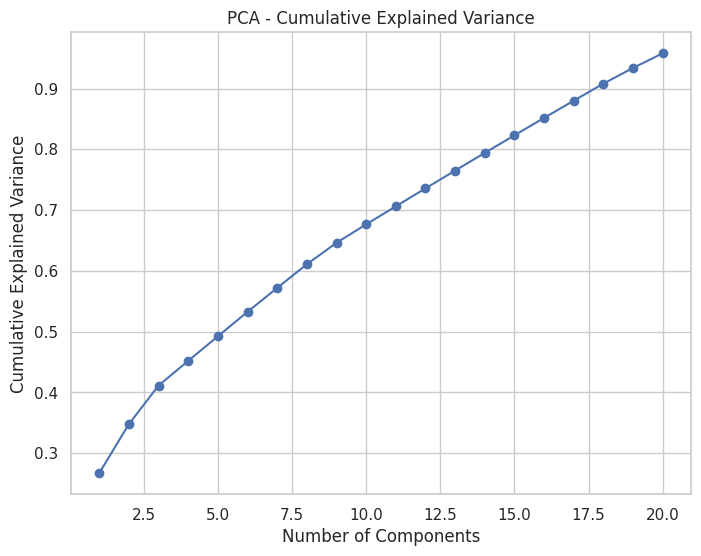

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

The PCA analysis indicated that you need 20 principal components to capture 95% of the variance in the dataset. Practically, this means that our data, which had many more than 20 features, can be compressed into 20 new features (the principal components) without losing much variance.

## Justification for Feature Subsetting

Given the scope of our project `Clinical Interpretability` is important to stakeholders(clinicians, healthcare administrators, or regulators). Therefore to understand each input variable’s effect on the model, use the top 18 original features.

This is not done in isolation, since we would be training, tree-based models for this project, we can utilize SHAP values and partial dependence plots to understand how each feature affects predictions.

Also, since we are using tree-based models like Random Forest and Gradient Boosted Trees already handle correlated variables quite well, so the performance gain from PCA might be small.

### Proof of Concept

In [ ]:
# --------------------------
# 1. Setup: Top 18 Features
# --------------------------
# Example: Suppose you have the following top 18 feature names (based on your feature importance ranking).
top_18_features = [X_train_resampled.columns[indices[i]] for i in range(18)]

# Get the feature names from the scaled data (X_train_resampled) as a list
feature_names = X_train_resampled.columns

# Subset the scaled arrays using the filtered indices
X_train_top18 = X_train_resampled[top_18_features]
X_val_top18 = X_val_resampled[top_18_features]



# ----------------------------------------
# 2. Train & Evaluate Random Forest (Top 18)
# ----------------------------------------
rf_top18 = RandomForestClassifier(random_state=42)
rf_top18.fit(X_train_top18, y_train_resampled)

y_pred_top18 = rf_top18.predict(X_val_top18)
y_prob_top18 = rf_top18.predict_proba(X_val_top18)

acc_top18 = accuracy_score(y_val_resampled, y_pred_top18)
f1_top18 = f1_score(y_val_resampled, y_pred_top18, average='macro')  # 'macro' for multi-class
roc_top18 = roc_auc_score(y_val_resampled, y_prob_top18, multi_class='ovr')  # for multi-class

print("=== Top 18 Features Results ===")
print(f"Accuracy:  {acc_top18 *100 :.2f}")
print(f"F1-Score:  {f1_top18 *100 :.2f}")
print(f"ROC AUC:   {roc_top18 *100 :.2f}")
print("")

# ----------------------------------------
# 3. PCA Approach
# ----------------------------------------
# X_train_pca and X_val_pca are the arrays from your PCA transformation.
# For example, if you set n_components=20, X_train_pca.shape[1] should be 20.

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train_resampled)

y_pred_pca = rf_pca.predict(X_val_pca)
y_prob_pca = rf_pca.predict_proba(X_val_pca)

acc_pca = accuracy_score(y_val_resampled, y_pred_pca)
f1_pca = f1_score(y_val_resampled, y_pred_pca, average='macro')
roc_pca = roc_auc_score(y_val_resampled, y_prob_pca, multi_class='ovr')

print("=== PCA (n_components=20) Results ===")
print(f"Accuracy:  {acc_pca *100 :.2f}")
print(f"F1-Score:  {f1_pca *100 :.2f}")
print(f"ROC AUC:   {roc_pca *100 :.2f}")

=== Top 18 Features Results ===
Accuracy:  96.88
F1-Score:  96.88
ROC AUC:   99.68

=== PCA (n_components=20) Results ===
Accuracy:  95.22
F1-Score:  95.22
ROC AUC:   99.25


From the results observed above, building a random forest classification model using the `top 18 features` yielded better results than the PCA version of the random forest model with `n_components = 20`. Now we can go ahead and do our feature subsetting with confidence.

## Feature Subsetting

Now we can correctly pick the needed features from our original data and apply some last preprocessing and go ahead and train. From the Proof of concept models, the data wasn't scaled but the model was robust and strong so we won't scale the data for our model building. If there is a need at later stages we will come and do it.

In [ ]:
# Subset top 18 features from original X data
X_top18 = X[top_18_features]
X_top18

,Pain Intensity,Pain Location_No Pain,Oxygen Saturation (%),Body Temperature (°C),Pain Crises Frequency (past year),Respiratory Rate (bpm),Heart Rate (bpm),Acute Chest Syndrome,Hospitalization History (past year),Dizziness,Pain Location_Head,Nausea,Fever,Jaundice,Shortness of Breath,Swelling,Headache,Fatigue
0,5.0,False,86.4,0.0,5.0,1.0,1.0,2.0,1.0,5.0,False,1.0,4.0,5.0,4.0,2.0,3.0,5.0
1,0.0,True,97.9,1.0,1.0,1.0,1.0,2.0,0.0,1.0,False,0.0,0.0,1.0,0.0,2.0,0.0,4.0
2,2.0,False,91.1,1.0,4.0,1.0,1.0,3.0,3.0,4.0,False,2.0,5.0,0.0,0.0,0.0,4.0,2.0
3,5.0,False,96.8,0.0,5.0,1.0,2.0,1.0,3.0,0.0,True,3.0,2.0,0.0,1.0,1.0,1.0,5.0
4,0.0,True,95.9,1.0,0.0,1.0,1.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0.0,True,96.7,1.0,1.0,1.0,1.0,2.0,0.0,1.0,False,0.0,0.0,2.0,2.0,1.0,1.0,0.0
54996,8.0,False,89.1,0.0,5.0,2.0,2.0,3.0,1.0,2.0,False,5.0,4.0,5.0,5.0,4.0,3.0,1.0
54997,0.0,True,97.7,1.0,3.0,1.0,1.0,1.0,0.0,1.0,False,1.0,1.0,0.0,0.0,1.0,0.0,2.0
54998,0.0,True,97.3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,False,0.0,2.0,1.0,3.0,0.0,1.0,1.0


In [ ]:
X_top18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Pain Intensity                       55000 non-null  float64
 1   Pain Location_No Pain                55000 non-null  bool   
 2   Oxygen Saturation (%)                55000 non-null  float64
 3   Body Temperature (°C)                55000 non-null  float64
 4   Pain Crises Frequency (past year)    55000 non-null  float64
 5   Respiratory Rate (bpm)               55000 non-null  float64
 6   Heart Rate (bpm)                     55000 non-null  float64
 7   Acute Chest Syndrome                 55000 non-null  float64
 8   Hospitalization History (past year)  55000 non-null  float64
 9   Dizziness                            55000 non-null  float64
 10  Pain Location_Head                   55000 non-null  bool   
 11  Nausea                      

In [ ]:
# Split into train, val, and test sets (using stratification for balanced target representation)
X_train, X_temp, y_train, y_temp = train_test_split(X_top18, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Using SMOTETomek resample the X_train, X_val, y_train and y_val
smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)
X_val_resampled, y_val_resampled = smotetomek.fit_resample(X_val, y_val)

In [ ]:
# reassign the resampled sets to the original variables
X_train = X_train_resampled
X_val = X_val_resampled
y_train = y_train_resampled
y_val = y_val_resampled

In [ ]:
# let's clear unused things from memory and prep for training
del X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled

We are set now, we have all the datasets we need for model training. We don't apply SMOTETomek on the `X_test` and `y_test` because we want the results we get to be the correct performance of the model and not a fluke. This was also done to prevent data leakage in the test set.

# Model Training & Hyperparameter Tuning

At this stage, we are going to train our models and tune them through GridSearch with Cross-validation to get the best models. The models we are going to train are:

1. Random Forest Classifier
2. Gradient Boosting Classifier
3. XGB Classifier
4. AdaBoost Classifier

After we will ensemble the top 3 performing models using a `Voting Classifier` to get a our final model

Let's define a train and evaluation loops and all utility functions

## Util Functions

In [ ]:
def train_model(model, param_grid, X, y):
    """
    Trains a model using grid search with cross-validation.
    Parameters:
      model: scikit-learn model instance.
      param_grid: dict of hyperparameters to search.
      X: Training features.
      y: Training target.
    Returns:
      The best estimator found by grid search.
    """
    cv = KFold(n_splits=7, random_state=42, shuffle=True)
    # Use 'f1_weighted' to account for multiclass imbalance.
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv,
                               scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X, y)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best f1_weighted score: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

In [ ]:
def evaluate_model(model, X_val, y_val, classes, n_classes, y_binarized, model_name="Model"):
    # Predictions and probabilities
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)

    # Print classification report
    print(f"\t=== {model_name} Classification Report ===")
    print(classification_report(y_val, y_pred))

    # Confusion Matrix
    print(f"\n\n\t=== {model_name} Confusion Matrix ===")
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n\n\n")

    # Plot ROC curves for each class
    print(f"\t\t=== {model_name} ROC Curves ===")
    plt.figure(figsize=(6, 4))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc_i = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc_i:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curves")
    plt.legend(loc="lower right")
    plt.show()

    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    print(f"\n\n\n{model_name} Accuracy: {acc:.4f}")

    # ROC AUC (multiclass using OvR)
    try:
        roc_auc = roc_auc_score(y_val, y_prob, multi_class='ovr', average='weighted')
        print(f"{model_name} ROC AUC: {roc_auc:.4f}")
    except Exception as e:
        print(f"{model_name} ROC AUC could not be computed: {e}")

In [ ]:
def plot_roc_curves_multiclass(models, X_val, y_val, classes):
    """
    Plots ROC curves for multiple models on a single graph for a multiclass problem.

    Args:
        models (dict): A dictionary mapping model names to fitted model objects.
        X_val (array-like): Validation features.
        y_val (array-like): Validation target labels.
        classes (list): List of class labels.

    Returns:
        None (Displays the plot)
    """
    y_binarized = label_binarize(y_val, classes=classes)
    n_classes = y_binarized.shape[1]

    plt.figure(figsize=(8, 6))
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_val)
        # Micro-average ROC curve
        fpr, tpr, _ = roc_curve(y_binarized.ravel(), y_prob.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (micro-avg AUC = {roc_auc:.2f})")

        # Macro-average ROC curve (handling the case where fpr or tpr might be scalars)
        all_fpr = np.unique(np.concatenate([roc_curve(y_binarized[:, i], y_prob[:, i])[0] for i in range(n_classes)]))

        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_prob[:, i])

            mean_tpr += np.interp(all_fpr, fpr, tpr)

        # Calculate macro-average ROC curve and AUC
        mean_tpr /= n_classes
        roc_auc_macro = auc(all_fpr, mean_tpr)

        # Plot macro-average ROC curve
        plt.plot(all_fpr, mean_tpr, linestyle='--',
                 label=f"{model_name} (macro-avg AUC = {roc_auc_macro:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for All Models")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# define function to load models and store in a models dict
def load_models(model_dir="/content/drive/MyDrive/Capstone_Trial_Methodology/models"):
    models = {}
    for filename in os.listdir(model_dir):
        if filename.endswith(".pkl"):
            model_name = os.path.splitext(filename)[0]
            model_path = os.path.join(model_dir, filename)
            models[model_name] = joblib.load(model_path)
    return models

## Model I: Random Forest Classifier

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

best_grid_rf = {
    'n_estimators': [500],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [False]
}
rf_model  = train_model(RandomForestClassifier(random_state=42), best_grid_rf, X_train, y_train)

Best parameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best f1_weighted score: 0.9800


## Model II: Gradient Boosting Classifier

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0]
}

best_grid_gb = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [3],
    'subsample': [0.8]
}
gb_model  = train_model(GradientBoostingClassifier(random_state=42), best_grid_gb, X_train, y_train)

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best f1_weighted score: 0.9767


## Model III: eXtreme Gradient Boosting Classifier


In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
best_grid_xgb = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [5],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
xgb_model = train_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        best_grid_xgb, X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best f1_weighted score: 0.9792


## Model IV: Adaptive Gradient Boosting Classifier

In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

best_grid_ada = {
    'n_estimators': [150],
    'learning_rate': [ 0.5]
}
ada_model = train_model(AdaBoostClassifier(random_state=42), best_grid_ada, X_train, y_train)

Best parameters for AdaBoostClassifier: {'learning_rate': 0.5, 'n_estimators': 150}
Best f1_weighted score: 0.9683


## Save Models

In [ ]:
# Store all trained models for evaluation:
models = {
    "RandomForest": rf_model,
    "GradientBoosting": gb_model,
    "XGBoost": xgb_model,
    "AdaBoost": ada_model,
}

In [ ]:
# define a function to go through model dict and save to storage
def save_models(trained_models=models, model_dir="/content/drive/MyDrive/Capstone_Trial_Methodology/models"):
    for model_name, model in models.items():
        joblib.dump(model, os.path.join(model_dir, f"{model_name}.pkl"))
        # communicate to user
        print(f"Model {model_name} saved to {model_dir}")
    # say completed
    print("All models saved.")

In [ ]:
# save models
save_models()

Model RandomForest saved to /content/drive/MyDrive/Capstone_Trial_Methodology/models
Model GradientBoosting saved to /content/drive/MyDrive/Capstone_Trial_Methodology/models
Model XGBoost saved to /content/drive/MyDrive/Capstone_Trial_Methodology/models
Model AdaBoost saved to /content/drive/MyDrive/Capstone_Trial_Methodology/models
All models saved.


## Evaluation on Validation Set

Now we have our trained models, we are going to evaluate on our validation set enhanced through `SMOTETomek` to handle class imbalance

In [ ]:
# load the trained models
models = load_models()
print(f'Trained Models are:')
models

Trained Models are:


{'RandomForest': RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=42),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                            random_state=42, subsample=0.8),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.05, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=300,
               n_jobs=None, num_parallel_tree=None, obje

In [ ]:
# Binarize labels for ROC analysis (assumes y_train and y_val hold class labels)
classes = np.unique(y_val)
n_classes = len(classes)
y_val_binarized = label_binarize(y_val, classes=classes)

Now we will use our evaluate function to evaluate the models.

### Random Forest Model Evaluation

	=== Random Forest Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4110
         1.0       0.95      0.95      0.95      4108
         2.0       0.95      0.95      0.95      4107

    accuracy                           0.97     12325
   macro avg       0.97      0.97      0.97     12325
weighted avg       0.97      0.97      0.97     12325



	=== Random Forest Confusion Matrix ===


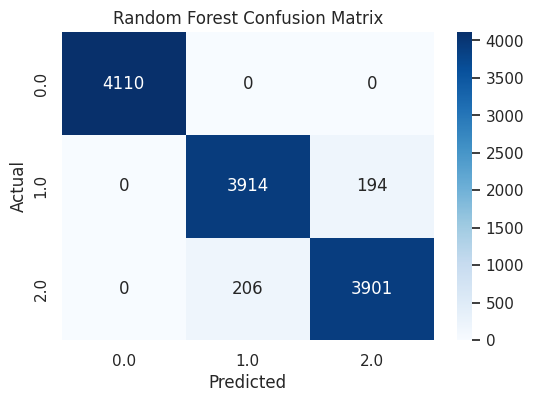





		=== Random Forest ROC Curves ===


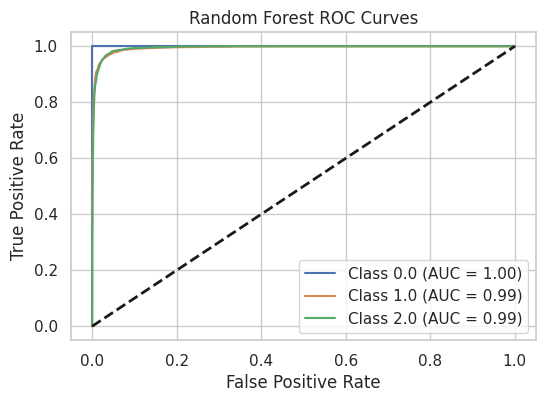




Random Forest Accuracy: 0.9675
Random Forest ROC AUC: 0.9963


In [ ]:
# evaluate random forest model
evaluate_model(models["RandomForest"], X_val, y_val, classes, n_classes, y_val_binarized, "Random Forest")

### Gradient Boosting Model Evaluation

	=== Gradient Boosting Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4110
         1.0       0.97      0.95      0.96      4108
         2.0       0.95      0.97      0.96      4107

    accuracy                           0.97     12325
   macro avg       0.97      0.97      0.97     12325
weighted avg       0.97      0.97      0.97     12325



	=== Gradient Boosting Confusion Matrix ===


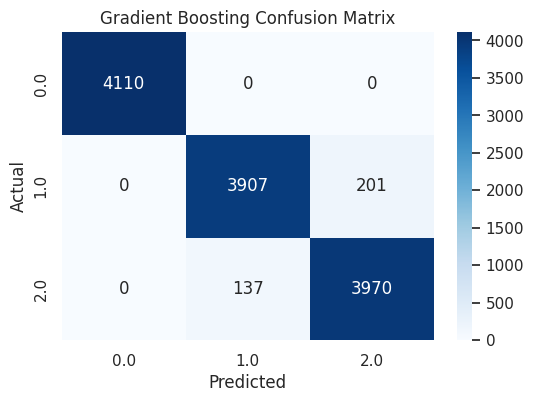





		=== Gradient Boosting ROC Curves ===


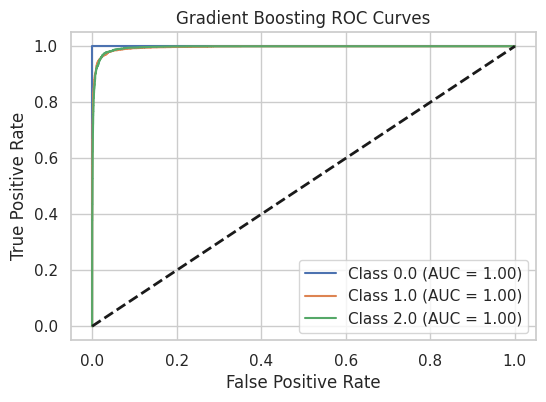




Gradient Boosting Accuracy: 0.9726
Gradient Boosting ROC AUC: 0.9972


In [ ]:
# evaluate gradient boosting model
evaluate_model(models["GradientBoosting"], X_val, y_val, classes, n_classes, y_val_binarized, "Gradient Boosting")

### eXtreme Gradient Boosting Model Evaluation

	=== XGBoost Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4110
         1.0       0.96      0.95      0.96      4108
         2.0       0.95      0.96      0.96      4107

    accuracy                           0.97     12325
   macro avg       0.97      0.97      0.97     12325
weighted avg       0.97      0.97      0.97     12325



	=== XGBoost Confusion Matrix ===


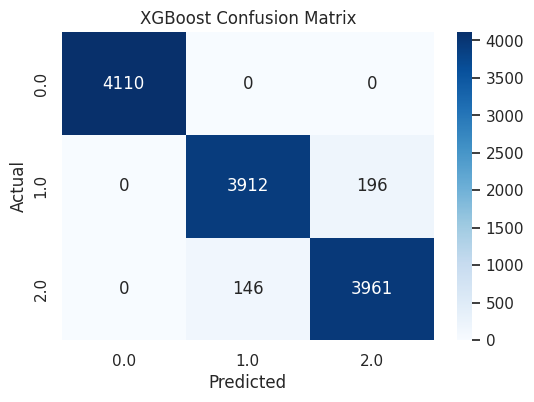





		=== XGBoost ROC Curves ===


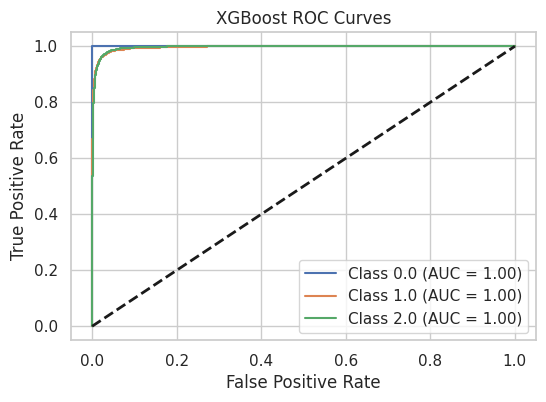




XGBoost Accuracy: 0.9723
XGBoost ROC AUC: 0.9972


In [ ]:
# evaluate xgb model
evaluate_model(models["XGBoost"], X_val, y_val, classes, n_classes, y_val_binarized, "XGBoost")

### Adaptive Gradient Boosting Model Evaluation

	=== AdaBoost Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4110
         1.0       0.96      0.94      0.95      4108
         2.0       0.94      0.96      0.95      4107

    accuracy                           0.97     12325
   macro avg       0.97      0.97      0.97     12325
weighted avg       0.97      0.97      0.97     12325



	=== AdaBoost Confusion Matrix ===


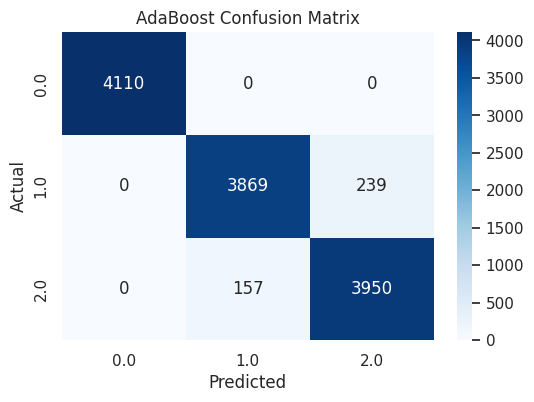





		=== AdaBoost ROC Curves ===


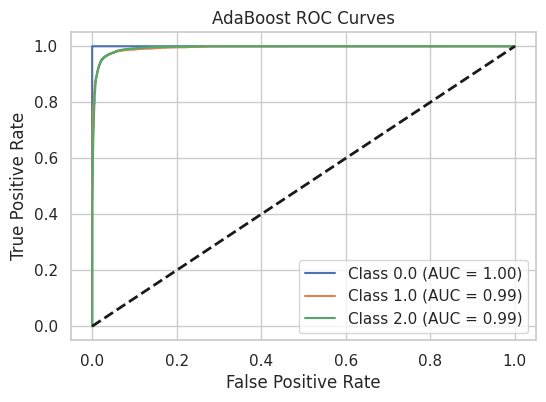




AdaBoost Accuracy: 0.9679
AdaBoost ROC AUC: 0.9963


In [ ]:
# evaluate ada boost model
evaluate_model(models["AdaBoost"], X_val, y_val, classes, n_classes, y_val_binarized, "AdaBoost")

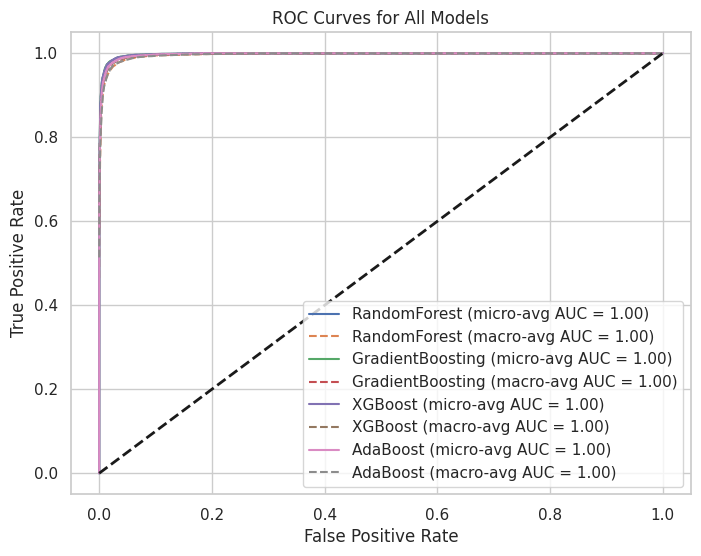

In [ ]:
# roc for all models
plot_roc_curves_multiclass(models, X_val, y_val, classes)

## Evaluation on Test Set

Now our model does well on the val set which is promising. Now, we are going to do a true evaluation of the model by subjecting it to the test set. This set is not handled with `SMOTETomek` so the model is guaranteed to perform well in the wild

In [ ]:
# load the trained models
models = load_models()
print(f'Trained Models are:')
models

Trained Models are:


{'RandomForest': RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=42),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                            random_state=42, subsample=0.8),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.05, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=300,
               n_jobs=None, num_parallel_tree=None, obje

In [ ]:
# Binarize labels for ROC analysis (assumes y_train and y_val hold class labels)
classes = np.unique(y_test)
n_classes = len(classes)
y_val_binarized = label_binarize(y_test, classes=classes)

Now we will use our evaluate function to evaluate the models.

### Random Forest Model Evaluation

	=== Random Forest Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4112
         1.0       0.95      0.96      0.96      2890
         2.0       0.91      0.89      0.90      1248

    accuracy                           0.97      8250
   macro avg       0.96      0.95      0.95      8250
weighted avg       0.97      0.97      0.97      8250



	=== Random Forest Confusion Matrix ===


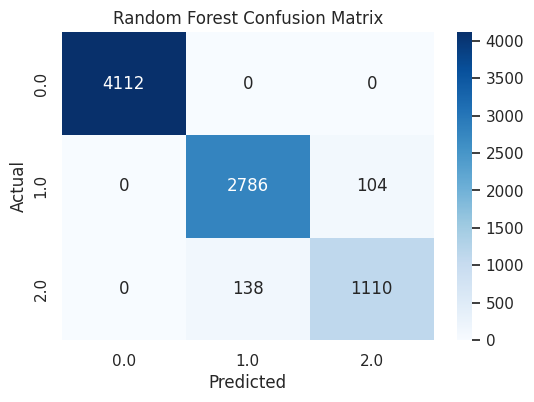





		=== Random Forest ROC Curves ===


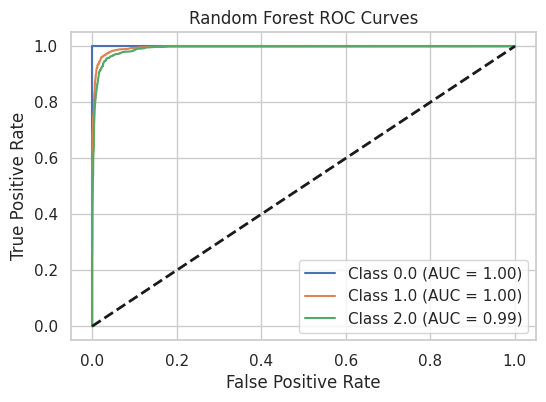




Random Forest Accuracy: 0.9707
Random Forest ROC AUC: 0.9973


In [ ]:
# evaluate random forest model
evaluate_model(models["RandomForest"], X_test, y_test, classes, n_classes, y_val_binarized, "Random Forest")

### Gradient Boosting Model Evaluation

	=== Gradient Boosting Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4112
         1.0       0.96      0.96      0.96      2890
         2.0       0.91      0.91      0.91      1248

    accuracy                           0.97      8250
   macro avg       0.96      0.96      0.96      8250
weighted avg       0.97      0.97      0.97      8250



	=== Gradient Boosting Confusion Matrix ===


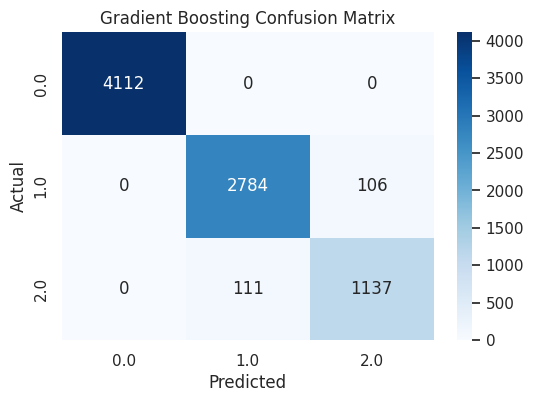





		=== Gradient Boosting ROC Curves ===


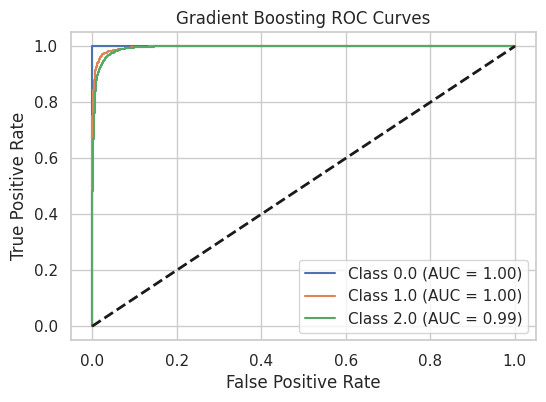




Gradient Boosting Accuracy: 0.9737
Gradient Boosting ROC AUC: 0.9980


In [ ]:
# evaluate gradient boosting model
evaluate_model(models["GradientBoosting"], X_test, y_test, classes, n_classes, y_val_binarized, "Gradient Boosting")

### eXtreme Gradient Boosting Model Evaluation

	=== XGBoost Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4112
         1.0       0.96      0.96      0.96      2890
         2.0       0.92      0.91      0.91      1248

    accuracy                           0.97      8250
   macro avg       0.96      0.96      0.96      8250
weighted avg       0.97      0.97      0.97      8250



	=== XGBoost Confusion Matrix ===


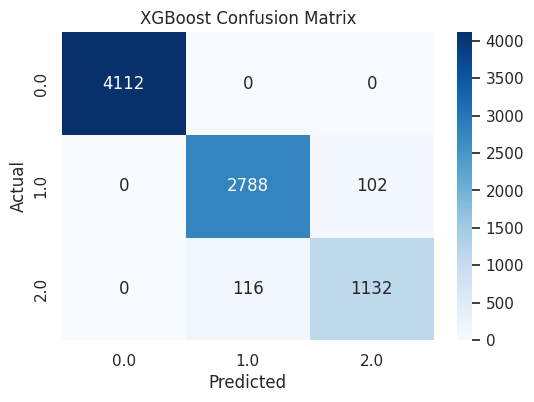





		=== XGBoost ROC Curves ===


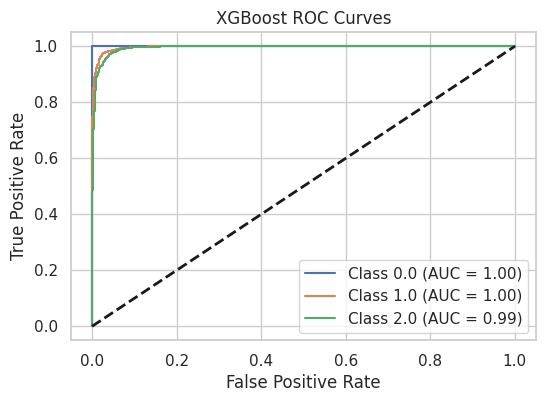




XGBoost Accuracy: 0.9736
XGBoost ROC AUC: 0.9980


In [ ]:
# evaluate xgb model
evaluate_model(models["XGBoost"], X_test, y_test, classes, n_classes, y_val_binarized, "XGBoost")

### Adaptive Gradient Boosting Model Evaluation

	=== AdaBoost Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4112
         1.0       0.95      0.95      0.95      2890
         2.0       0.89      0.90      0.89      1248

    accuracy                           0.97      8250
   macro avg       0.95      0.95      0.95      8250
weighted avg       0.97      0.97      0.97      8250



	=== AdaBoost Confusion Matrix ===


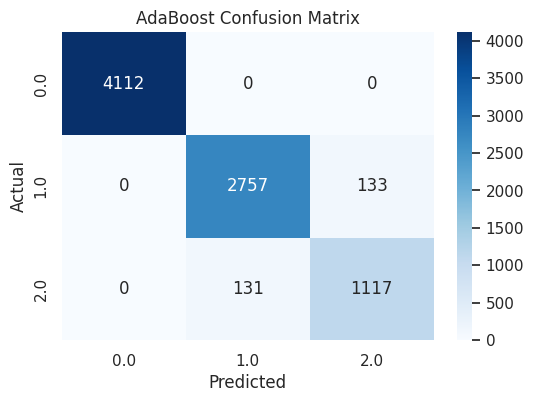





		=== AdaBoost ROC Curves ===


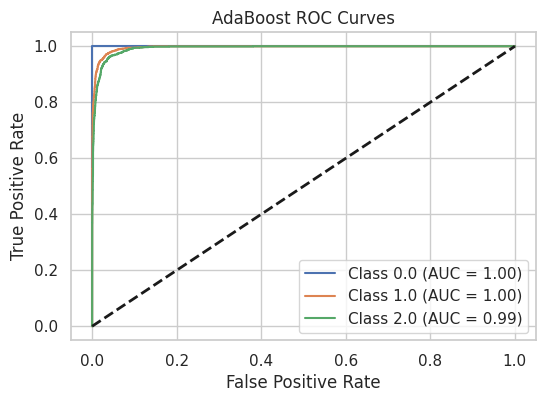




AdaBoost Accuracy: 0.9680
AdaBoost ROC AUC: 0.9975


In [ ]:
# evaluate ada boost model
evaluate_model(models["AdaBoost"], X_test, y_test, classes, n_classes, y_val_binarized, "AdaBoost")

### ROC Curve for all Models

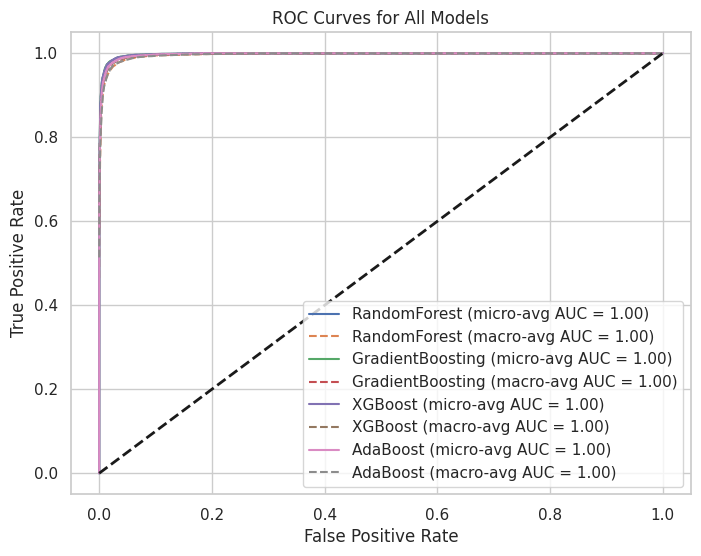

In [ ]:
# roc for all models
plot_roc_curves_multiclass(models, X_val, y_val, classes)

From our evaluation of the test set, which is highly imbalanced, we observe very good results. However, going into building our voting classifier, we are not using all models. We are only using the top 3 performing models which were:

1. **Random Forest Accuracy: 0.9707**
2. **Gradient Boosting Accuracy: 0.9737**
3. **XGBoost Accuracy: 0.9736**

In later sections of our notebook we will explain why these work well using SHAP and partial dependence plots

# Ensemble Modeling

As mentioned previously, three best‑performing models (Random Forest, XGBoost, and Gradient Boosting) are combined in a soft voting ensemble. This ensemble is then evaluated similarly to verify if combining models improves overall performance.

In [ ]:
# load models and pick out random forest, gb and xgb models and assign to independent variables
rf_model = models["RandomForest"]
gb_model = models["GradientBoosting"]
xgb_model = models["XGBoost"]

In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('gb', gb_model)
    ],
    voting='soft',  # soft voting uses predicted probabilities
    n_jobs=-1
)

In [ ]:
# train the model
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=300,
                                                         random_state=42,
                                                         subsample=0.8))],
                 n_jobs=-1, voting='soft')

## Evaluating Ensemble Model on Val Set



Ensemble Voting Classifier Evaluation:
	=== Ensemble Classifier Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4110
         1.0       0.96      0.95      0.96      4108
         2.0       0.95      0.96      0.96      4107

    accuracy                           0.97     12325
   macro avg       0.97      0.97      0.97     12325
weighted avg       0.97      0.97      0.97     12325



	=== Ensemble Classifier Confusion Matrix ===


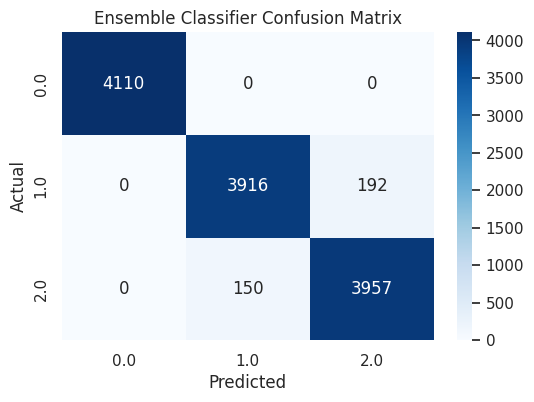





		=== Ensemble Classifier ROC Curves ===


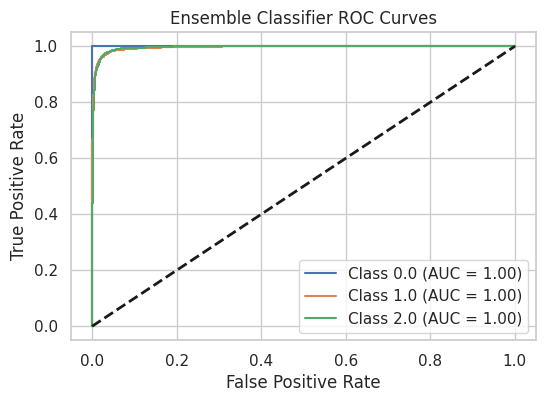




Ensemble Classifier Accuracy: 0.9723
Ensemble Classifier ROC AUC: 0.9970


In [ ]:
print("Ensemble Voting Classifier Evaluation:")
classes = np.unique(y_val)
n_classes = len(classes)
y_val_binarized = label_binarize(y_val, classes=classes)
evaluate_model(ensemble, X_val, y_val,classes, n_classes, y_val_binarized, model_name="Ensemble Classifier")

## Evaluating Ensemble Model on Test Set

Ensemble Voting Classifier Evaluation:
	=== Ensemble Classifier Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4112
         1.0       0.96      0.97      0.96      2890
         2.0       0.92      0.91      0.91      1248

    accuracy                           0.97      8250
   macro avg       0.96      0.96      0.96      8250
weighted avg       0.97      0.97      0.97      8250



	=== Ensemble Classifier Confusion Matrix ===


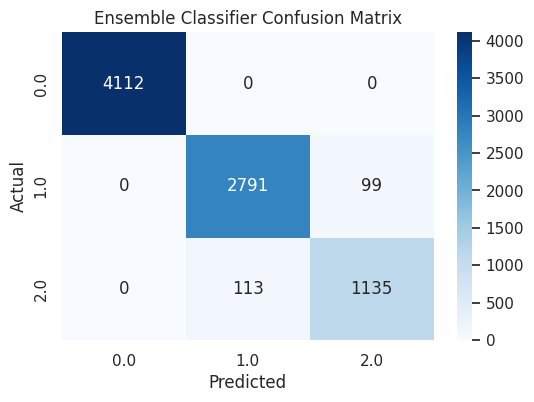





		=== Ensemble Classifier ROC Curves ===


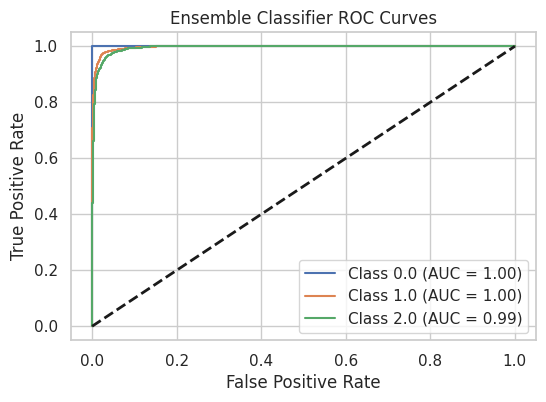




Ensemble Classifier Accuracy: 0.9743
Ensemble Classifier ROC AUC: 0.9979


In [ ]:
print("Ensemble Voting Classifier Evaluation:")
classes = np.unique(y_test)
n_classes = len(classes)
y_val_binarized = label_binarize(y_test, classes=classes)
evaluate_model(ensemble, X_test, y_test,classes, n_classes, y_val_binarized, model_name="Ensemble Classifier")

In [ ]:
# save ensemble model
joblib.dump(ensemble, "/content/drive/MyDrive/Capstone_Trial_Methodology/models/ensemble_model.pkl")

['/content/drive/MyDrive/Capstone_Trial_Methodology/models/ensemble_model.pkl']